# Laboratorio de implementación II

# Trabajo Práctico Final

# Consigna 1: Modelo de predicción de inmuebles

### *Alumnos:* Gibertini Lopez de Maturana Jorgelina; Santamaria Bonamico Irina; Scheli Layla; Quintero Juan Francisco y Viera Arnaldo

*Consigna:*

*1.	Armar un dataset con propiedades a la venta.*

*2.	Analizar el dataset y extraer información e insights relevantes.*

*3.	Armar un modelo predictivo para predecir el valor de venta de los inmuebles.*

*4.	Presentar y comunicar los insights*.



# Desarrollo

El objetivo del presente trabajo consiste en la construccion de un modelo para predecir el valor de venta de los inmuebles ubicados en la ciudad de Rosario. 

El dataset a utilizar estará compuesto por publicaciones de cocheras, casas y departamentos en venta de la plataforma de e-commerce MercadoLibre.

# Parte 1 - Armado del dataset de inmuebles en la ciudad de Rosario

La primera etapa del análisis consistió en el armado del dataset. 

Para ello, se accedió a la API pública de Mercado Libre, desde la cual se visualizaron todas las publicaciones de venta de inmuebles.

<img src=https://assets.entrepreneur.com/images/misc/1584487204_LOGOCODOS_fondoblanco-01.png>

In [1]:
import requests 
import json 
import pandas as pd 
import numpy as np 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
warnings.filterwarnings("ignore")

Se definió una función que permite acceder a la información de la dirección del sitio web que vamos a usar (URL):

In [3]:
def get_response(url):
    try:
        response = requests.get(url, timeout=3)
        response.raise_for_status()
        return response
    except requests.exceptions.HTTPError as errh:
        print ("Http Error:",errh)
    except requests.exceptions.ConnectionError as errc:
        print ("Error Connecting:",errc)
    except requests.exceptions.Timeout as errt:
        print ("Timeout Error:",errt)
    except requests.exceptions.RequestException as err:
        print ("OOps: Something Else",err)

Para responder las consignas del trabajo práctico se definió como área de cobertura la ciudad de Rosario. 

Desde la API pública de Mercado Libre puede obtenerse información en real-time de las primeras mil publicaciones, por lo cual se construyeron polígonos de diferentes dimensiones, con sus correspondientes latitudes y longitudes, que representaron diferentes zonas de la ciudad, tratando de abarcar toda el área de cobertura. En el siguiente mapa se puede visualizar cada una de las áreas bajo estudio: https://www.google.com/maps/d/edit?mid=1MHaRRb-eueaA_3yGywHA-wrNA7sFpR6Z&usp=sharing.

El interés radicó en indagar sobre aquellos inmuebles categorizados como "departamentos, "casas" y "cocheras" que estén a la venta en las publicaciones de Mercado Libre. 

Un primer paso fue ir llamando a los primeros 1050 registros de ciertas áreas geográficas de cada una de las categorías a estudiar (*Casas, Cocheras y Departamentos*), comprendiendo para cada una las mil publicaciones autorizadas desde la API pública y un offset de 50. 

## Casas

La categoría *Casas* se dividió en dos zonas, de acuerdo a la disponibilidad de datos del sitio web.

### Casas, área 1


In [4]:
offset=0 
url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-32.94_-32.89,lon:-60.771_-60.618&category=MLA401685&limit=50&offset=0#json'.format(offset)
r = get_response(url) 
maximum = int(str(r.json()["paging"]["total"])) 

print('Encontramos {} resultados para nuestra consulta'.format(maximum))

maximum=1000

item_list_casas = []
while r.status_code == 200 and offset <= maximum:
    url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-32.94_-32.89,lon:-60.771_-60.618&category=MLA401685&limit=50&offset={}#json'.format(offset)
    r = get_response(url)
    data = r.json()
    length = len(data['results'])
    for i in range(length):
        item_id = data['results'][i]['id']
        item_list_casas.append(item_id)
    print("Porcentaje de completitud: {:0.2%}".format(offset/maximum),end='\r')
    offset += 50
        
len(item_list_casas)

Encontramos 1295 resultados para nuestra consulta


1050

In [5]:
print(len(item_list_casas))
print(len(set(item_list_casas)))

1050
1050


### Casas, área 2

In [6]:
offset=0 
url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-33.01_-32.95,lon:-60.771_-60.618&category=MLA401685&limit=50&offset=0#json'.format(offset)
r = get_response(url) 
maximum = int(str(r.json()["paging"]["total"])) 

print('Encontramos {} resultados para nuestra consulta'.format(maximum))

maximum=1000

item_list_casas2= []
while r.status_code == 200 and offset <= maximum:
    url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-33.01_-32.95,lon:-60.771_-60.618&category=MLA401685&limit=50&offset=0#json'.format(offset)
    r = get_response(url)
    data = r.json()
    length = len(data['results'])
    for i in range(length):
        item_id = data['results'][i]['id']
        item_list_casas2.append(item_id)
    print("Porcentaje de completitud: {:0.2%}".format(offset/maximum),end='\r')
    offset += 50
        
len(item_list_casas2)

Encontramos 1045 resultados para nuestra consulta


1050

Se controlaron las publicaciones repetidas, 

In [7]:
print(len(item_list_casas2))
print(len(set(item_list_casas2)))

1050
50


## Departamentos

Para la busqueda de departamentos se realizaron un total de 8 corridas. 4 correponden a "Zonas Centro" y el resto corresponde a: "Zona Sur", "Zona Macrocentro", "Zona Norte" y "Zona Suroeste".

### Departamentos Zona Centro

#### Departamentos Zona Centro, área 1

In [8]:
url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-32.9446_-32.9228,lon:-60.66146_-60.64312&category=MLA401686&limit=50&offset=0#json' #inmueble / deptos  / venta / propiedades individuales / zonadentr!
offset=0 

url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-32.9446_-32.9228,lon:-60.66146_-60.64312&category=MLA401686&limit=50&offset=0#json'.format(offset)
r = get_response(url) 
maximum = int(str(r.json()["paging"]["total"])) 

print('Encontramos {} resultados para nuestra consulta'.format(maximum))


maximum=1000

item_list_deptos1a = []
while r.status_code == 200 and offset <= maximum:
    url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-32.9446_-32.9228,lon:-60.66146_-60.64312&category=MLA401686&limit=50&offset={}#json'.format(offset)
    r = get_response(url)
    data = r.json()
    length = len(data['results'])
    for i in range(length):
        item_id = data['results'][i]['id']
        item_list_deptos1a.append(item_id)
    print("Porcentaje de completitud: {:0.2%}".format(offset/maximum),end='\r')
    offset += 50
        
len(item_list_deptos1a)

Encontramos 4081 resultados para nuestra consulta


1050

#### Departamentos Zona Centro, área 2

In [9]:
url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-32.9446_-32.9228,lon:-60.64141_-60.62012&category=MLA401686&limit=50&offset=0#json' #inmueble / deptos  / venta / propiedades individuales / zonadentr!
offset=0 

offset=0 
url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-32.9446_-32.9228,lon:-60.64141_-60.62012&category=MLA401686&limit=50&offset=0#json'.format(offset)
r = get_response(url) 
maximum = int(str(r.json()["paging"]["total"])) 

print('Encontramos {} resultados para nuestra consulta'.format(maximum))


maximum=1000


item_list_deptos1b = []
while r.status_code == 200 and offset <= maximum:
    url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-32.9446_-32.9228,lon:-60.64141_-60.62012&category=MLA401686&limit=50&offset={}#json'.format(offset)
    r = get_response(url)
    data = r.json()
    length = len(data['results'])
    for i in range(length):
        item_id = data['results'][i]['id']
        item_list_deptos1b.append(item_id)
    print("Porcentaje de completitud: {:0.2%}".format(offset/maximum),end='\r')
    offset += 50
        
len(item_list_deptos1b)

Encontramos 1057 resultados para nuestra consulta


1050

#### Departamentos Zona Centro, área 3

In [10]:
url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-32.96164_-32.94579,lon:-60.66146_-60.64312&category=MLA401686&limit=50&offset=0#json' #inmueble / deptos  / venta / propiedades individuales / zonadentr!
offset=0 

offset=0
url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-32.96164_-32.94579,lon:-60.66146_-60.64312&category=MLA401686&limit=50&offset=0#json'.format(offset)
r = get_response(url) 
maximum = int(str(r.json()["paging"]["total"])) 

print('Encontramos {} resultados para nuestra consulta'.format(maximum))


maximum=1000


item_list_deptos1c = []
while r.status_code == 200 and offset <= maximum:
    url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-32.96164_-32.94579,lon:-60.66146_-60.64312&category=MLA401686&limit=50&offset={}#json'.format(offset)
    r = get_response(url)
    data = r.json()
    length = len(data['results'])
    for i in range(length):
        item_id = data['results'][i]['id']
        item_list_deptos1c.append(item_id)
    print("Porcentaje de completitud: {:0.2%}".format(offset/maximum),end='\r')
    offset += 50
        
len(item_list_deptos1c)

Encontramos 5293 resultados para nuestra consulta


1050

#### Departamentos Zona Centro, área 4

In [11]:
url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-32.9446_-32.9228,lon:-60.63956_-60.61964&category=MLA401686&limit=50&offset=0#json' #inmueble / deptos  / venta / propiedades individuales / zonadentr!
offset=0 

offset=0 
url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-32.9446_-32.9228,lon:-60.63956_-60.61964&category=MLA401686&limit=50&offset=0#json'.format(offset)
r = get_response(url)
maximum = int(str(r.json()["paging"]["total"])) 

print('Encontramos {} resultados para nuestra consulta'.format(maximum))


maximum=1000


item_list_deptos1d = []
while r.status_code == 200 and offset <= maximum:
    url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-32.9446_-32.9228,lon:-60.63956_-60.61964&category=MLA401686&limit=50&offset={}#json'.format(offset)
    r = get_response(url)
    data = r.json()
    length = len(data['results'])
    for i in range(length):
        item_id = data['results'][i]['id']
        item_list_deptos1d.append(item_id)
    print("Porcentaje de completitud: {:0.2%}".format(offset/maximum),end='\r')
    offset += 50
        
len(item_list_deptos1d)

Encontramos 654 resultados para nuestra consulta


654

### Departamentos Zona Sur

In [12]:
url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-33.01_-32.963,lon:-60.657_-60.618&category=MLA401686&limit=50&offset=0#json' #inmueble / deptos  / venta / propiedades individuales / zonasur!
offset=0

offset=0 
url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-33.01_-32.963,lon:-60.657_-60.618&category=MLA401686&limit=50&offset=0#json'.format(offset)
r = get_response(url)
maximum = int(str(r.json()["paging"]["total"])) 

print('Encontramos {} resultados para nuestra consulta'.format(maximum))


maximum=1000


item_list_deptos2 = []
while r.status_code == 200 and offset <= maximum:
    url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-33.01_-32.963,lon:-60.657_-60.618&category=MLA401686&limit=50&offset={}#json'.format(offset)
    r = get_response(url)
    data = r.json()
    length = len(data['results'])
    for i in range(length):
        item_id = data['results'][i]['id']
        item_list_deptos2.append(item_id)
    print("Porcentaje de completitud: {:0.2%}".format(offset/maximum),end='\r')
    offset += 50
        
len(item_list_deptos2)

Encontramos 1663 resultados para nuestra consulta


1050

### Departamentos Zona Macrocentro

In [13]:
url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-32.95348_-32.922294,lon:-60.73433_-60.66584&category=MLA401686&limit=50&offset=0#json' #inmueble / deptos  / venta / propiedades individuales 
offset=0 

offset=0
url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-32.95348_-32.922294,lon:-60.73433_-60.66584&category=MLA401686&limit=50&offset=0#json'.format(offset)
r = get_response(url) 
maximum = int(str(r.json()["paging"]["total"])) 

print('Encontramos {} resultados para nuestra consulta'.format(maximum))

maximum=1000

item_list_deptos3 = []
while r.status_code == 200 and offset <= maximum:
    url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-32.95348_-32.922294,lon:-60.73433_-60.66584&category=MLA401686&limit=50&offset={}#json'.format(offset)
    r = get_response(url)
    data = r.json()
    length = len(data['results'])
    for i in range(length):
        item_id = data['results'][i]['id']
        item_list_deptos3.append(item_id)
    print("Porcentaje de completitud: {:0.2%}".format(offset/maximum),end='\r')
    offset += 50
        
len(item_list_deptos3)

Encontramos 4036 resultados para nuestra consulta


1050

### Departamentos Zona Norte

In [14]:
url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-32.92011_-32.86057,lon:-60.73368_-60.66584&category=MLA401686&limit=50&offset=0#json' #inmueble / deptos  / venta / propiedades individuales 
offset=0

offset=0 
url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-32.92011_-32.86057,lon:-60.73368_-60.66584&category=MLA401686&limit=50&offset=0#json'.format(offset)
r = get_response(url) 
maximum = int(str(r.json()["paging"]["total"])) 

print('Encontramos {} resultados para nuestra consulta'.format(maximum))


maximum=1000

item_list_deptos4 = []
while r.status_code == 200 and offset <= maximum:
    url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-32.92011_-32.86057,lon:-60.73368_-60.66584&category=MLA401686&limit=50&offset={}#json'.format(offset)
    r = get_response(url)
    data = r.json()
    length = len(data['results'])
    for i in range(length):
        item_id = data['results'][i]['id']
        item_list_deptos4.append(item_id)
    print("Porcentaje de completitud: {:0.2%}".format(offset/maximum),end='\r')
    offset += 50
        
len(item_list_deptos4)

Encontramos 499 resultados para nuestra consulta


499

In [15]:
print(len(item_list_deptos4))
print(len(set(item_list_deptos4)))

499
499


### Departamentos Zona Suroeste


In [16]:
url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-33.01295_-32.95823,lon:-60.73368_-60.66584&category=MLA401686&limit=50&offset=0#json' #inmueble / deptos  / venta / propiedades individuales 
offset=0 

offset=0 
url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-33.01295_-32.95823,lon:-60.73368_-60.66584&category=MLA401686&limit=50&offset=0#json'.format(offset)
r = get_response(url) 
maximum = int(str(r.json()["paging"]["total"])) 

print('Encontramos {} resultados para nuestra consulta'.format(maximum))

maximum=1000

item_list_deptos5 = []
while r.status_code == 200 and offset <= maximum:
    url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-33.01295_-32.95823,lon:-60.73368_-60.66584&category=MLA401686&limit=50&offset={}#json'.format(offset)
    r = get_response(url)
    data = r.json()
    length = len(data['results'])
    for i in range(length):
        item_id = data['results'][i]['id']
        item_list_deptos5.append(item_id)
    print("Porcentaje de completitud: {:0.2%}".format(offset/maximum),end='\r')
    offset += 50
        
len(item_list_deptos5)

Encontramos 355 resultados para nuestra consulta


355

## Cocheras

In [17]:
url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-33.01_-32.90,lon:-60.771_-60.618&category=MLA50543&limit=50&offset=0#json' #inmueble / cocheras  / venta

offset=0 
url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-33.01_-32.90,lon:-60.771_-60.618&category=MLA50543&limit=50&offset=0#json'.format(offset)
r = get_response(url) 
maximum = int(str(r.json()["paging"]["total"])) 

print('Encontramos {} resultados para nuestra consulta'.format(maximum))

maximum=1000

item_list_cocheras = []
while r.status_code == 200 and offset <= maximum:
    url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-33.01_-32.90,lon:-60.771_-60.618&category=MLA50543&limit=50&offset={}#json'.format(offset)
    r = get_response(url)
    data = r.json()
    length = len(data['results'])
    for i in range(length):
        item_id = data['results'][i]['id']
        item_list_cocheras.append(item_id)
    print("Porcentaje de completitud: {:0.2%}".format(offset/maximum),end='\r')
    offset += 50
        
len(item_list_cocheras)

Encontramos 1578 resultados para nuestra consulta


1050

Se unificaron todas las busquedas en una sola lista (item_list). 

In [18]:
item_list = []
item_list.extend(item_list_casas)
item_list.extend(item_list_casas2)
item_list.extend(item_list_cocheras)
item_list.extend(item_list_deptos1a)  
item_list.extend(item_list_deptos1b)  
item_list.extend(item_list_deptos1c)  
item_list.extend(item_list_deptos1d)  
item_list.extend(item_list_deptos2)  
item_list.extend(item_list_deptos3)  
item_list.extend(item_list_deptos4)  
item_list.extend(item_list_deptos5)  

len (item_list) 

9908

In [19]:
print(len(item_list))
print(len(set(item_list)))

9908
8260


In [20]:
item_list2 = (set(item_list))

In [21]:
item_list2= list(item_list2)
item_list=item_list2

In [22]:
print(len(item_list))
print(len(set(item_list)))

8260
8260


Se observó una baja proporción de publicaciones repetidas; se eliminaron los repetidos.

In [23]:
final_list = []
for i in range(len(item_list)):
    item="https://api.mercadolibre.com/items/{}".format(item_list[i])
    item_add = requests.get(item)
    item_add = item_add.json()
    final_list.append(item_add)
    print("Porcentaje de completitud: {:0.2%}".format((i+1)/len(item_list)),end='\r')

Se exploraron las llaves que tiene el archivo, con el objetivo de conocer la información disponible para el armado del dataset.

In [24]:
final_list[0].keys()

dict_keys(['id', 'site_id', 'title', 'subtitle', 'seller_id', 'category_id', 'official_store_id', 'price', 'base_price', 'original_price', 'currency_id', 'initial_quantity', 'available_quantity', 'sold_quantity', 'sale_terms', 'buying_mode', 'listing_type_id', 'start_time', 'stop_time', 'condition', 'permalink', 'thumbnail_id', 'thumbnail', 'secure_thumbnail', 'pictures', 'video_id', 'descriptions', 'accepts_mercadopago', 'non_mercado_pago_payment_methods', 'shipping', 'international_delivery_mode', 'seller_address', 'seller_contact', 'location', 'coverage_areas', 'attributes', 'warnings', 'listing_source', 'variations', 'status', 'sub_status', 'tags', 'warranty', 'catalog_product_id', 'domain_id', 'parent_item_id', 'differential_pricing', 'deal_ids', 'automatic_relist', 'date_created', 'last_updated', 'health', 'catalog_listing', 'channels'])

Se validó luego el recuento inicial, tomando nota del volumen inicial de elementos con los que vamos a trabajar.

In [25]:
recuento_inicial=len(final_list)
recuento_inicial

8260

Se transformaron los datos a una base *json*.

In [26]:
data=pd.json_normalize(final_list)

Se definió una función para traer los elementos considerados de interés para el armado del dataset.
dentro de la funcion se definió un paramétro para traer todos los elementos, sin importar si el atributo no esta presente: posteriormente se definirán criterios de selección.

In [27]:
def traerdato(elemento,rama,subrama,valor='value_name'):
    indices=[]
    for i,s in enumerate(elemento[rama]):
        for j in s:
            if subrama in str(s[j]):
                indices.append([i,s])
    if len(indices) ==0:
        return ''
    else:
        return indices[0][1][valor]

Posteriormente, se procedió al análisis de la información que el dataset debería contener. Dentro de la llave "attributes" se encontró gran cantidad de información, por lo cual se seleccionaron aquellos atributos considerados de interés.

Para esto se realizó un análisis de negocio, es decir, se evaluaron qué aspectos resultan relevantes para la venta de las distintas propiedades.

In [28]:
elementos_a_sumar = ['COVERED_AREA','TOTAL_AREA', 'FULL_BATHROOMS', 'BEDROOMS', 'HAS_SWIMMING_POOL', 'HAS_GRILL', 
'HAS_STUDY','HAS_HEATING','HAS_NATURAL_GAS','FACING','HAS_BALCONY','HAS_DRESSING_ROOM','HAS_GARDEN','HAS_HALF_BATH',
'HAS_MAID_ROOM','HAS_PATIO','HAS_PLAYROOM','HAS_TERRACE','PROFESSIONAL_USE_ALLOWED','SUITABLE_FOR_MORTGAGE_LOAN',
'HAS_SECURITY','FLOORS', 'PROPERTY_AGE','ROOMS','HAS_LAUNDRY','COVERED_AREA','TOTAL_AREA']


Se creó una función por la cual se almacenó en un diccionario, para cada elemento, la información contenida en los atributos definidos en la lista anterior.

In [29]:
diccionario = {}
for columna in elementos_a_sumar:
    diccionario[columna] = np.NaN
    lista = []
    for elemento in final_list:
        lista.append(traerdato(elemento,'attributes',columna))
    diccionario[columna] = pd.Series(lista)

In [30]:
data1 = pd.DataFrame(diccionario)

Se unió el diccionario con la base de datos.

In [31]:
data2=pd.concat([data,data1],axis=1)

# Parte 2 - Analizar el dataset y extraer información e insights relevantes

El primer paso para analizar la base de datos consistió en la eliminación de aquella información que no resultó significante según el objeto de análisis, o que, por las propias características, se dedujo que trajo información no confiable, incompleta, etc. y en consecuencia no aportaba validez al dataset.

In [32]:
#data2 = pd.read_csv(r'C:\Users\quintej\Desktop\MCD\Laboratorio de Implementacion 2\DMA_LABO_Austral_2021_rosario-main\Notebooks\dia_5\data2b.csv') 

In [33]:
data2=data2.drop(
    ["base_price","subtitle","site_id","original_price","initial_quantity","available_quantity","sold_quantity",
     "sale_terms","buying_mode","thumbnail_id","thumbnail","secure_thumbnail","descriptions","accepts_mercadopago",
    "non_mercado_pago_payment_methods","international_delivery_mode","coverage_areas","attributes","warnings","listing_source",
    "variations","status","sub_status","warranty","catalog_product_id","domain_id","differential_pricing","deal_ids",
    "automatic_relist","health","catalog_listing","shipping.mode","shipping.methods","shipping.tags","shipping.dimensions",
    "shipping.free_shipping","shipping.logistic_type","shipping.store_pick_up","seller_address.city.id","seller_address.country.id",
    "seller_address.country.name","seller_address.search_location.city.id","seller_address.search_location.state.id",
    "seller_address.search_location.state.name","seller_contact.contact","seller_contact.other_info","seller_contact.country_code",
    "seller_contact.area_code","seller_contact.phone","seller_contact.country_code2","seller_contact.area_code2",
    "seller_contact.phone2","seller_contact.email","seller_contact.webpage","location.neighborhood.id","location.city.id",
    "location.state.id","location.state.name","location.country.id", "official_store_id", "video_id", "parent_item_id",
    "seller_address.search_location.neighborhood.id","channels","shipping.local_pick_up","seller_address.city.name","seller_address.state.id",
    "seller_address.state.name","seller_address.search_location.city.name","seller_address.id","location.zip_code","location.city.name","location.country.name"],
    axis=1)

analizando las categorías, encontramos que la categoria "FLOORS" significaba segun el usuario de cada publicacion dos cosas; la altura del edificio o el piso en el cual esta el departamento / cochera o la cantidad de pisos que posee la casa. al ser esta informacion poco confiable, se procede a eliminar esa variable.

In [34]:
data2=data2.drop('FLOORS', axis=1)

Realizando un análisis más exhaustivo, se observaron los nombres de los atributos, así como el tipo de variables y la existencia de missings (datos faltantes).

In [35]:
data2.columns

Index(['id', 'title', 'seller_id', 'category_id', 'price', 'currency_id',
       'listing_type_id', 'start_time', 'stop_time', 'condition', 'permalink',
       'pictures', 'tags', 'date_created', 'last_updated',
       'seller_address.search_location.neighborhood.name',
       'location.address_line', 'location.neighborhood.name', 'COVERED_AREA',
       'TOTAL_AREA', 'FULL_BATHROOMS', 'BEDROOMS', 'HAS_SWIMMING_POOL',
       'HAS_GRILL', 'HAS_STUDY', 'HAS_HEATING', 'HAS_NATURAL_GAS', 'FACING',
       'HAS_BALCONY', 'HAS_DRESSING_ROOM', 'HAS_GARDEN', 'HAS_HALF_BATH',
       'HAS_MAID_ROOM', 'HAS_PATIO', 'HAS_PLAYROOM', 'HAS_TERRACE',
       'PROFESSIONAL_USE_ALLOWED', 'SUITABLE_FOR_MORTGAGE_LOAN',
       'HAS_SECURITY', 'PROPERTY_AGE', 'ROOMS', 'HAS_LAUNDRY'],
      dtype='object')

In [36]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8260 entries, 0 to 8259
Data columns (total 42 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   id                                                8260 non-null   object 
 1   title                                             8260 non-null   object 
 2   seller_id                                         8260 non-null   int64  
 3   category_id                                       8260 non-null   object 
 4   price                                             8260 non-null   float64
 5   currency_id                                       8260 non-null   object 
 6   listing_type_id                                   8260 non-null   object 
 7   start_time                                        8260 non-null   object 
 8   stop_time                                         8260 non-null   object 
 9   condition          

Salvo *SELLER_ID* (**integer**) y *PRICE* (**float**), el resto de las variables son de tipo **object**.

Por tal motivo, se transformaron en numéricas las variables *PROPERTY_AGE, COVERED_AREA, TOTAL_AREA, FULL_BATHROOMS, BEDROOMS, FLOOR,* y *ROOMS*. Esta decisión se basó en el hecho de que dichas variables reflejan efectivamente cantidades (antigüedad de la propiedad en cantidad de años, área cubierta en cantidad de metros cuadrados, etc.), por lo cual es importante que en el dataset aparezcan como numéricas.

In [37]:
data2['PROPERTY_AGE']=data2['PROPERTY_AGE'].replace({" años":""},regex=True)
data2['PROPERTY_AGE']=pd.to_numeric(data2['PROPERTY_AGE'])
data2['COVERED_AREA']=data2['COVERED_AREA'].replace({" m²":""},regex=True)
data2['COVERED_AREA']=data2['COVERED_AREA'].replace({" ha":""},regex=True)
data2['TOTAL_AREA']=data2['TOTAL_AREA'].replace({" m²":""},regex=True)
data2['TOTAL_AREA']=data2['TOTAL_AREA'].replace({" ha":""},regex=True)
data2['COVERED_AREA']=pd.to_numeric(data2['COVERED_AREA'])
data2['TOTAL_AREA']=pd.to_numeric(data2['TOTAL_AREA'])
data2['FULL_BATHROOMS']=pd.to_numeric(data2['FULL_BATHROOMS'])
data2['BEDROOMS']=pd.to_numeric(data2['BEDROOMS'])
data2['ROOMS']=pd.to_numeric(data2['ROOMS'])

Luego de un análisis en profundidad del dataset, se tomaron diferentes criterios de decisión sobre algunas variables por diferentes razones.

A continuación se justificarán las mismas.

### Criterio 1: No se incluirán en el análisis aquellos inmuebles sin superficie

Como no tiene sentido un inmueble sin superficie, se eliminaron del dataset aquellas publicaciones con un área = 0. 

In [38]:
data2 = data2.drop(data2[data2['TOTAL_AREA']==0].index)

### Criterio 2: No se incluirán aquellos inmuebles con precio de venta en pesos

En el contexto argentino actual, con elevadas tasas de inflación, es una práctica ampliamente adoptada la fijación de los precios de venta de las propiedades en dólares. Es por ello que se eliminaron aquellas propiedades con precios de venta en pesos, para poder trabajar con una base de datos que posea una unidad de medida monetaria homogénea, más estable, y ampliamente utilizada. 


In [39]:
data2 = data2.drop(data2[data2["currency_id"]=="ARS"].index)

### Criterio 3: Se eliminaron aquellos inmuebles cuyo precio figura como "1111", "11111" y "111111"


En general, cuando hay campos obligatorios para las publicaciones pero los vendedores no desean completar los datos del mismo, colocan distintos valores, dentro de los cuales se encuentran 1111, 11111, etc. Es por ello que se eliminaron las publicaciones que contenían estos guarismos, debido a que no reflejarían el verdadero valor de venta del inmueble.

In [40]:
data2 = data2.drop(data2[data2["price"]==1111].index)
data2 = data2.drop(data2[data2["price"]==11111].index)
data2 = data2.drop(data2[data2["price"]==111111].index)

### Criterio 4: Cocheras individuales y para automóviles 


Respecto a cocheras, se tomaron los siguientes criterios de eliminación: 

- Aquellas publicaciones cuyos precios son superiores a USD 40.000, y
- Aquellas publicaciones cuya área cubierta sea inferior a 4 m2 y superior a 50 m2.

Estas restricciones son para tomar solamente aquellas publicaciones de cocheras que se vendan exclusivamente para autos, pick ups y camiones (no motos ni bicicletas).

A su vez, para poder realizar una comparación homogénea entre cocheras para un vehículo, se elimaron áreas superiores a los 50 m2 (superan la mayoría de los m2 correspondientes a las publicaciones de cocheras). 

In [41]:
data2 = data2.drop(data2[(data2.category_id=="MLA50543")&(data2.price>40000)].index)
data2 = data2.drop(data2[(data2.category_id=="MLA50543")&(data2.TOTAL_AREA>50)].index)
data2 = data2.drop(data2[(data2.category_id=="MLA50543")&(data2.TOTAL_AREA<4)].index)
data2 = data2.drop(data2[(data2.category_id=="MLA50543")&(data2.COVERED_AREA==0)].index)

### Criterio 5: Departamentos con área cubierta y baño

Respecto a departamentos, se tomaron los siguientes criterios de eliminación: 

- Aquellas publicaciones de departamentos que no tengan baño (ya que no tiene sentido un departamento sin baño), y 
- Aquellas publicaciones de departamentos que no tengan área cubierta.

In [42]:
data2 = data2.drop(data2[(data2.category_id=="MLA401686")&(data2.FULL_BATHROOMS==0)].index)
data2 = data2.drop(data2[(data2.category_id=="MLA401686")&(data2.COVERED_AREA==0)].index)

### Criterio 6: Casas sin área cubierta y baño, y Casas con muy bajo valor.


Respecto a casas, se tomaron los siguientes criterios de eliminación:

- Aquellas publicaciones de casas que no tengan baño (ya que no tiene sentido una casa sin baño), y 
- Aquellas publicaciones de casas que no tengan área cubierta.

In [43]:
data2 = data2.drop(data2[(data2.category_id=="MLA401685")&(data2.FULL_BATHROOMS==0)].index)
data2 = data2.drop(data2[(data2.category_id=="MLA401685")&(data2.COVERED_AREA==0)].index)

Un numero muy limitado de casas tienen un valor muy bajo, cerca de 20.000 Dolares, investigando esos elementos encontramos que las mismas son casas destinadas a ser demolidas y reconstruidas; como tales, dejan de ser un bien "casa" a pasar a ser un lote; por lo tanto son eliminadas

In [44]:
data2 = data2.drop(data2[(data2.category_id=="MLA401685")&(data2.price<25000)].index)

### Criterio 7: Aspectos poco habituales en Casas y Departamentos


Respecto a Casas y Departamentos, se tomaron los siguientes criterios de eliminación:

- Aquellas publicaciones de propiedades con un área total superior a 2500m2,  la probabilidad de que haya muchas propiedades de dichas dimensiones no es elevada, por lo cual no tiene sentido dado que podría generar importantes desequilibrios en el modelo (en particular, si se aplicase una regresión lineal). 
- Aquellas publicaciones de propiedades cuyo valor de venta superen los 2 millones de USD, por el mismo motivo del punto anterior.
- Aquellas publicaciones de propiedades que tengan una antiguedad mayor a 250 años, ya que porbablemente haya un error de carga porque Rosario tiene 160 años. 
- Aquellas publicaciones de propiedades que figuran con una antiguedad menor a 0, ya que se entienden las mismas como proyectos inmobiliarios (inmuebles de pozo). En este tipo de operacion a "futuro" entendemos que hay dos variables significativas de peso que nos pueden afectar en la estimacion; el riesgo que la constructora NO termine el inmueble (varios casos en Rosario), y que la informacion brindidada del futuro inmueble no se cumpla. Con todo esto entendemos que estas propiedades sen encuadran dentro de una nueva categoria (mas que un inmueble, entendemos que es un "contrato a futuro"); excluiremos estas operaciones del análisis. 

In [45]:
data2=data2[data2['TOTAL_AREA']<2500]

In [46]:
data2=data2[data2['PROPERTY_AGE']<250]
data2=data2[data2['PROPERTY_AGE']>-1]

In [47]:
data2=data2[data2['price']<2000000] 

Definidos los criterios de exclusión, se construyeron diferentes variables de tipo dummies, para reflejar la existencia (o no) de ciertas cualidades de la propiedad (tal como pileta, parrilla, balcón, etc.).

In [48]:
data2 = pd.get_dummies(data2, columns=["listing_type_id"], drop_first=True)

In [49]:
data2 = pd.get_dummies(data2, columns=["FACING"], drop_first=True)

In [50]:
data2["HAS_SWIMMING_POOL"] = pd.to_numeric(data2["HAS_SWIMMING_POOL"].replace(to_replace=['No', 'Sí'], value=[0, 1]))
data2["HAS_GRILL"] = pd.to_numeric(data2["HAS_GRILL"].replace(to_replace=['No', 'Sí'], value=[0, 1]))
data2["HAS_STUDY"] = pd.to_numeric(data2["HAS_STUDY"].replace(to_replace=['No', 'Sí'], value=[0, 1]))
data2["HAS_HEATING"] = pd.to_numeric(data2["HAS_HEATING"].replace(to_replace=['No', 'Sí'], value=[0, 1]))
data2["HAS_NATURAL_GAS"] = pd.to_numeric(data2["HAS_NATURAL_GAS"].replace(to_replace=['No', 'Sí'], value=[0, 1]))
data2["HAS_BALCONY"] = pd.to_numeric(data2["HAS_BALCONY"].replace(to_replace=['No', 'Sí'], value=[0, 1]))
data2["HAS_DRESSING_ROOM"] = pd.to_numeric(data2["HAS_DRESSING_ROOM"].replace(to_replace=['No', 'Sí'], value=[0, 1]))
data2["HAS_GARDEN"] = pd.to_numeric(data2["HAS_GARDEN"].replace(to_replace=['No', 'Sí'], value=[0, 1]))
data2["HAS_HALF_BATH"] = pd.to_numeric(data2["HAS_HALF_BATH"].replace(to_replace=['No', 'Sí'], value=[0, 1]))
data2["HAS_MAID_ROOM"] = pd.to_numeric(data2["HAS_MAID_ROOM"].replace(to_replace=['No', 'Sí'], value=[0, 1]))
data2["HAS_PATIO"] = pd.to_numeric(data2["HAS_PATIO"].replace(to_replace=['No', 'Sí'], value=[0, 1]))
data2["HAS_PLAYROOM"] = pd.to_numeric(data2["HAS_PLAYROOM"].replace(to_replace=['No', 'Sí'], value=[0, 1]))
data2["HAS_TERRACE"] = pd.to_numeric(data2["HAS_TERRACE"].replace(to_replace=['No', 'Sí'], value=[0, 1]))
data2["PROFESSIONAL_USE_ALLOWED"] = pd.to_numeric(data2["PROFESSIONAL_USE_ALLOWED"].replace(to_replace=['No', 'Sí'], value=[0, 1]))
data2["SUITABLE_FOR_MORTGAGE_LOAN"] = pd.to_numeric(data2["SUITABLE_FOR_MORTGAGE_LOAN"].replace(to_replace=['No', 'Sí'], value=[0, 1]))
data2["HAS_SECURITY"] = pd.to_numeric(data2["HAS_SECURITY"].replace(to_replace=['No', 'Sí'], value=[0, 1]))
data2["HAS_LAUNDRY"] = pd.to_numeric(data2["HAS_LAUNDRY"].replace(to_replace=['No', 'Sí'], value=[0, 1]))

En los casos que las variables dummies no posean informacion, se asumió que obedeció a que no poseían dicha cualidad, por lo cual se reemplazó por el valor 0 (ausencia). Realizamos un blind check con distintos inmuebles y se cumplia nuestro criterio.

In [51]:
data2["HAS_LAUNDRY"].fillna(0, inplace = True) 
data2["HAS_SWIMMING_POOL"].fillna(0, inplace = True) 
data2["HAS_GRILL"].fillna(0, inplace = True) 
data2["HAS_STUDY"].fillna(0, inplace = True) 
data2["HAS_HEATING"].fillna(0, inplace = True) 
data2["HAS_NATURAL_GAS"].fillna(0, inplace = True) 
data2["HAS_BALCONY"].fillna(0, inplace = True) 
data2["HAS_DRESSING_ROOM"].fillna(0, inplace = True) 
data2["HAS_GARDEN"].fillna(0, inplace = True) 
data2["HAS_HALF_BATH"].fillna(0, inplace = True) 
data2["HAS_MAID_ROOM"].fillna(0, inplace = True) 
data2["HAS_PATIO"].fillna(0, inplace = True) 
data2["HAS_SWIMMING_POOL"].fillna(0, inplace = True) 
data2["HAS_PLAYROOM"].fillna(0, inplace = True) 
data2["HAS_TERRACE"].fillna(0, inplace = True) 
data2["PROFESSIONAL_USE_ALLOWED"].fillna(0, inplace = True) 
data2["SUITABLE_FOR_MORTGAGE_LOAN"].fillna(0, inplace = True) 
data2["HAS_SECURITY"].fillna(0, inplace = True) 
data2["HAS_LAUNDRY"].fillna(0, inplace = True) 

Se controló la merma de la cantidad de observaciones derivado de la aplicación de los criterios anteriormente descriptos.

In [52]:
recuento_final=len(data2)
print ("Recuento inicial fue")
print(recuento_inicial)
print ("vs. un recuento final de")
print(recuento_final)

Recuento inicial fue
8260
vs. un recuento final de
6204


Como observamos hay una disminución de elementos, y se explica por la falta de informacion en criterios claves, outliers e información erronea (a consideracion por el equipo)

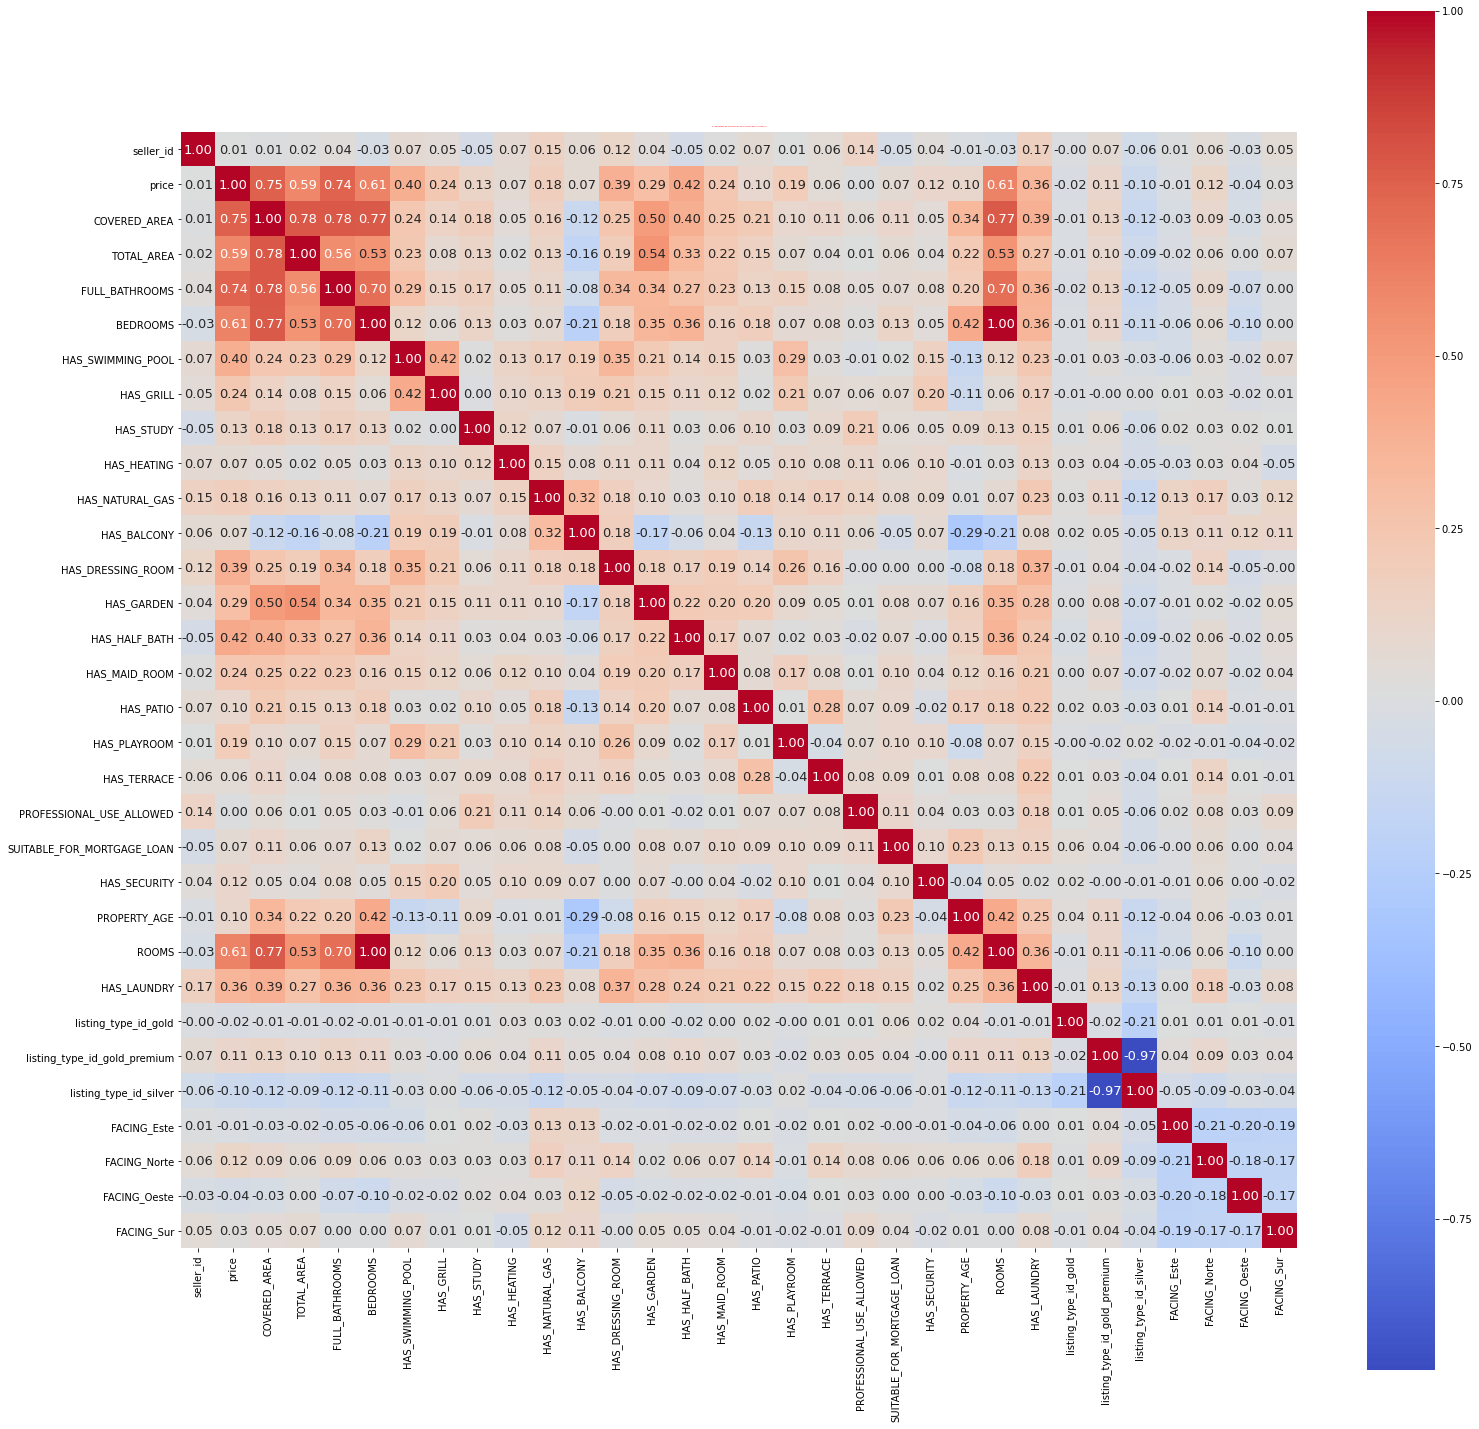

In [53]:
corrdata2 = data2.corr()

plt.figure(figsize = (25,25))
sns.heatmap(corrdata2, cbar = True, square = True, annot = True, annot_kws={'size': 13}, fmt= '.2f', cmap= 'coolwarm')
plt.title("Coeficientes de correlación de Pearson para Cocheras", fontsize = 2, color = "r")

plt.show()

El análisis de correlación mostró una correlación perfecta y positiva entre 'ROOMS' y 'BEDROOMS'. Al analizar los datos, se observó que se trató de dos variables que representan lo mismo (ya que los valores están exactamente duplicados), y otra muy elevada pero negativa entre 'listing_type_id_silver' y 'listing_type_id_gold_premium'. En consecuencia, se eliminaron las variables 'listing_type_id_silver' y 'BEDROOMS'.

También se quitó del dataset 'FACING_Sur', debido a que quedó implícita: todas las publicaciones que no son del resto de las zonas (a saber, 'FACING_Este', 'FACING_Norte', 'FACING_Oeste') pertenecen a la misma. Siguiendo un criterio de parsimonia, se decidió trabajar con la menor cantidad posible de variables y eliminar aquellas que quedaban implícitas en el modelo. 

In [54]:
data2=data2.drop('listing_type_id_silver', inplace=False, axis=1)
data2=data2.drop('FACING_Sur', inplace=False, axis=1)
data2=data2.drop('BEDROOMS', inplace=False, axis=1)

Definido el dataset general con el que se modelizará, se crearon datasets parciales para Cocheras, Casas y Departamentos con el objeto de realizar un análisis exploratorio de cada uno de ellos, dadas las diferentes características que presentan. ( y posterior análisis)

In [55]:
cocheras=data2[data2.category_id.eq("MLA50543")]
print("la cantidad de cocheras a analizar sera de:")
r=len(cocheras)
print(r)

casas=data2[data2.category_id.eq("MLA401685")]
print("la cantidad de casas a analizar sera de:")
m=len(casas)
print(m)

deptos= data2[data2.category_id.eq("MLA401686")]
print("la cantidad de departamentos a analizar sera de:")
l=len(deptos)
print(l)

la cantidad de cocheras a analizar sera de:
390
la cantidad de casas a analizar sera de:
849
la cantidad de departamentos a analizar sera de:
4965


# Exploration Dataset Analysis (EDA)

# EDA exclusivo para cocheras

In [56]:
cocheras.head()

,id,title,seller_id,category_id,price,currency_id,start_time,stop_time,condition,permalink,...,SUITABLE_FOR_MORTGAGE_LOAN,HAS_SECURITY,PROPERTY_AGE,ROOMS,HAS_LAUNDRY,listing_type_id_gold,listing_type_id_gold_premium,FACING_Este,FACING_Norte,FACING_Oeste
36,MLA924208128,Venta Cochera Pb - Corrientes 1800 Rosario,154654909,MLA50543,12500.0,USD,2021-06-06T22:41:04.000Z,2021-08-26T04:00:00.000Z,new,https://inmueble.mercadolibre.com.ar/MLA-92420...,...,0.0,0.0,0.0,NaN,0.0,0,0,0,0,0
101,MLA930174746,Cochera Constitución Al 900 - Echesortu,219947097,MLA50543,13500.0,USD,2021-07-20T14:16:38.000Z,2021-11-30T04:00:00.000Z,new,https://inmueble.mercadolibre.com.ar/MLA-93017...,...,0.0,0.0,0.0,NaN,0.0,0,0,0,0,0
109,MLA918526549,Cochera En Venta En Rosario,169964476,MLA50543,22426.0,USD,2021-04-29T18:54:51.000Z,2021-10-14T18:16:40.000Z,new,https://inmueble.mercadolibre.com.ar/MLA-91852...,...,0.0,0.0,0.0,NaN,0.0,0,0,0,0,0
111,MLA899386239,Cochera | Pichincha,680272458,MLA50543,29000.0,USD,2020-11-30T15:34:16.000Z,2021-08-29T22:23:22.000Z,new,https://inmueble.mercadolibre.com.ar/MLA-89938...,...,0.0,0.0,0.0,NaN,0.0,0,0,0,0,0
133,MLA916528468,Cochera A La Venta Edificio En Construcción En...,416541318,MLA50543,19000.0,USD,2021-04-16T12:27:30.000Z,2021-09-06T22:16:35.000Z,new,https://inmueble.mercadolibre.com.ar/MLA-91652...,...,0.0,0.0,0.0,NaN,0.0,0,0,0,0,0


Para este tipo de inmueble analizaremos solamente las variables: COVERED_AREA, PROPERTY_AGE y PRICE

In [57]:
cocheras[['COVERED_AREA', 'PROPERTY_AGE', 'price']].describe().T

,count,mean,std,min,25%,50%,75%,max
COVERED_AREA,389.0,12.912596,4.664802,1.0,12.0,12.0,13.0,67.0
PROPERTY_AGE,390.0,4.884615,11.510787,0.0,0.0,0.0,2.0,60.0
price,390.0,17362.958974,5422.323654,2531.0,13736.5,17250.0,20000.0,35000.0


Del cuadro se puede observar que en promedio, una cochera cuesta alrededor de USD 18.000 y tiene un área de cobertura de 13m2. La antiguedad promedio es de 2 años, contando también con cocheras de más de 50 años de antiguedad.

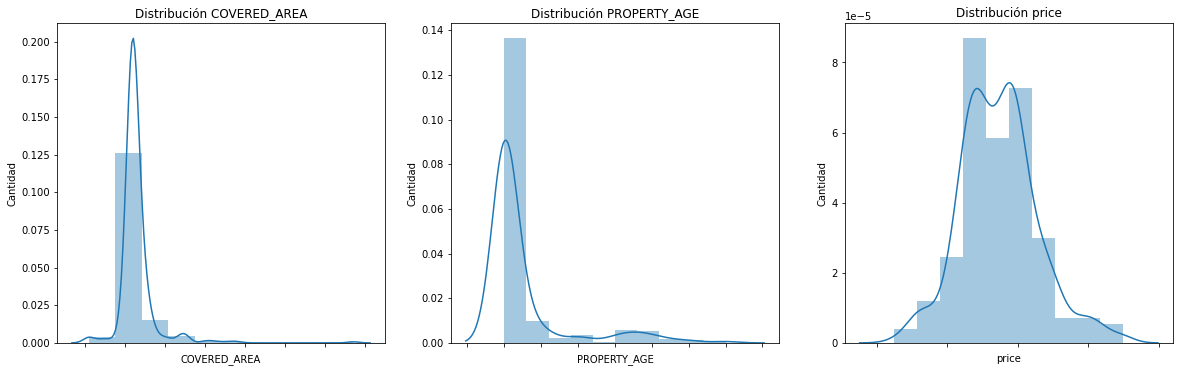

In [58]:
plt.figure(figsize=(20,20))
vars_to_plot = ['COVERED_AREA', 'PROPERTY_AGE','price']

for i, var in enumerate(vars_to_plot):
    plt.subplot(3,3,i+1) 
    value_counts = cocheras[var]
    ax=sns.distplot(value_counts,bins=10)
    title_string = "Distribución " + var
    plt.ylabel("Cantidad")
    plt.title(title_string)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

Los gráficos representados muestran que la distribución del precio de las cocheras y el área cubierta pueden considerarse distribuciones normales, con mayor dispersión en el caso del precio.

Por otro lado, la distribución de la antigüedad es marcadamente asimétrica, presentándose mayor concentración en aquellas unidades más nuevas (en particular, 2 años de antigüedad); esta es un característica logica de una ciudad que va creciendo y ofertando nuevas construcciones e inmuebles en el mercado.

<AxesSubplot:xlabel='COVERED_AREA', ylabel='PROPERTY_AGE'>

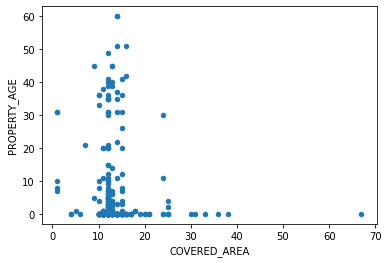

In [59]:
cocheras.plot.scatter('COVERED_AREA','PROPERTY_AGE')

<AxesSubplot:xlabel='COVERED_AREA', ylabel='price'>

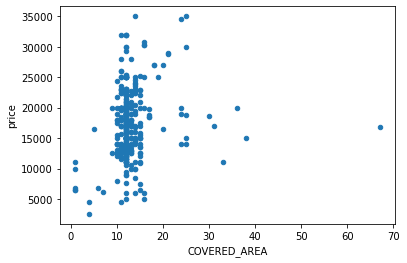

In [60]:
cocheras.plot.scatter('COVERED_AREA','price')

Los gráficos de dispersión no muestran una relación lineal entre las variables que representan área cubierta y antigüedad, como tampoco entre área cubierta y precio.



In [61]:
cocherasred = cocheras[["seller_id", "price", "COVERED_AREA", "HAS_SECURITY", "PROPERTY_AGE", "listing_type_id_gold_premium"]]

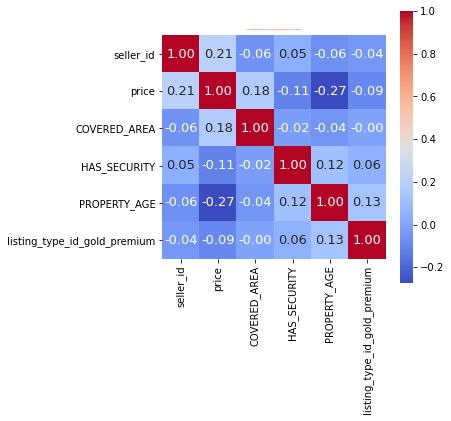

In [62]:
corr = cocherasred.corr()

plt.figure(figsize = (5,5))
sns.heatmap(corr, cbar = True, square = True, annot = True, annot_kws={'size': 13}, fmt= '.2f', cmap= 'coolwarm')
plt.title("Coeficientes de correlación de Pearson para Cocheras", fontsize = 2, color = "r")

plt.show()

In [63]:
print("La correlación de las variables de Cocheras es...")
print(corr, "\n")

La correlación de las variables de Cocheras es...
                              seller_id     price  COVERED_AREA  HAS_SECURITY  \
seller_id                      1.000000  0.214392     -0.060250      0.048583   
price                          0.214392  1.000000      0.178632     -0.110567   
COVERED_AREA                  -0.060250  0.178632      1.000000     -0.023117   
HAS_SECURITY                   0.048583 -0.110567     -0.023117      1.000000   
PROPERTY_AGE                  -0.064067 -0.272760     -0.045000      0.117610   
listing_type_id_gold_premium  -0.040597 -0.092514     -0.002129      0.056128   

                              PROPERTY_AGE  listing_type_id_gold_premium  
seller_id                        -0.064067                     -0.040597  
price                            -0.272760                     -0.092514  
COVERED_AREA                     -0.045000                     -0.002129  
HAS_SECURITY                      0.117610                      0.056128  
PROPERT

Respecto a la correlación entre las variables de Cocheras, no se observa una correlación fuerte (superior al 50%) entre ninguna de las variables. 

Aparentemente, el precio de las cocheras no está influído ni por el área, antigüedad, área cubierta, seguridad, tipo de vendedor ni id del vendedor. Por una cuestión de conocimiento del mercado, cabría esperar una relación entre zona y cochera, pero es una variable no comprendida dentro del modelo.

# EDA exclusivo para casas

In [64]:
casas=data2[data2.category_id.eq("MLA401685")]

In [65]:
casas.head()

,id,title,seller_id,category_id,price,currency_id,start_time,stop_time,condition,permalink,...,SUITABLE_FOR_MORTGAGE_LOAN,HAS_SECURITY,PROPERTY_AGE,ROOMS,HAS_LAUNDRY,listing_type_id_gold,listing_type_id_gold_premium,FACING_Este,FACING_Norte,FACING_Oeste
4,MLA919298131,Casona Comercial O Residencial En Pleno Pichincha,680272458,MLA401685,520000.0,USD,2021-05-05T19:08:02.000Z,2021-08-29T22:23:22.000Z,used,https://casa.mercadolibre.com.ar/MLA-919298131...,...,0.0,0.0,31.0,4.0,1.0,0,0,0,1,0
6,MLA919296442,Casa De 2 Dormitorios En Aldea,680272458,MLA401685,239000.0,USD,2021-05-05T19:06:34.000Z,2021-08-29T22:23:22.000Z,used,https://casa.mercadolibre.com.ar/MLA-919296442...,...,0.0,0.0,8.0,2.0,1.0,0,0,0,0,1
14,MLA913333986,Guemes 2400 - Casa Ideal Uso Comercial Y Vivienda,238539063,MLA401685,207000.0,USD,2021-03-24T15:42:02.000Z,2021-12-30T21:15:58.000Z,used,https://casa.mercadolibre.com.ar/MLA-913333986...,...,1.0,0.0,40.0,3.0,0.0,0,0,0,1,0
33,MLA927456348,Casa En Venta Country Tenis Rosario Aldea,258695292,MLA401685,700000.0,USD,2021-06-28T20:54:42.000Z,2021-12-29T04:00:00.000Z,used,https://casa.mercadolibre.com.ar/MLA-927456348...,...,0.0,1.0,15.0,4.0,1.0,0,0,1,0,0
45,MLA918307565,Casa Interna- Venta- Belgrano- Dos Dormitorio...,695310966,MLA401685,75000.0,USD,2021-04-28T14:19:37.000Z,2021-10-01T20:15:54.000Z,used,https://casa.mercadolibre.com.ar/MLA-918307565...,...,0.0,0.0,30.0,2.0,1.0,0,0,0,0,0


In [66]:
casas[['COVERED_AREA', 'TOTAL_AREA', 'PROPERTY_AGE', 'price']].describe().T

,count,mean,std,min,25%,50%,75%,max
COVERED_AREA,849.0,174.452297,100.773754,26.0,105.0,150.0,205.0,732.0
TOTAL_AREA,849.0,362.823322,367.075049,26.0,142.0,216.0,400.0,2080.0
PROPERTY_AGE,849.0,25.322733,21.230417,0.0,7.0,20.0,41.0,100.0
price,849.0,218850.871614,181615.803339,28000.0,96000.0,160000.0,280000.0,1250000.0


En el caso de Casas se observó que, en promedio, el precio de venta es superior a los USD 200.000. El promedio de casas va desde los 30k a los 1250k USD.  Por otro lado, mientras que el promedio del área de cobertura resultó cercano a los 200m2, la mitad de las casas presentó un área de cobertura cercano a los 150 m2.
Respecto a la antigüedad, el 50% de las propiedades tienen 25 años de antigüedad, pero se ha encontrado casas de mas de 40 años de antigüedad en el cuartil superior.


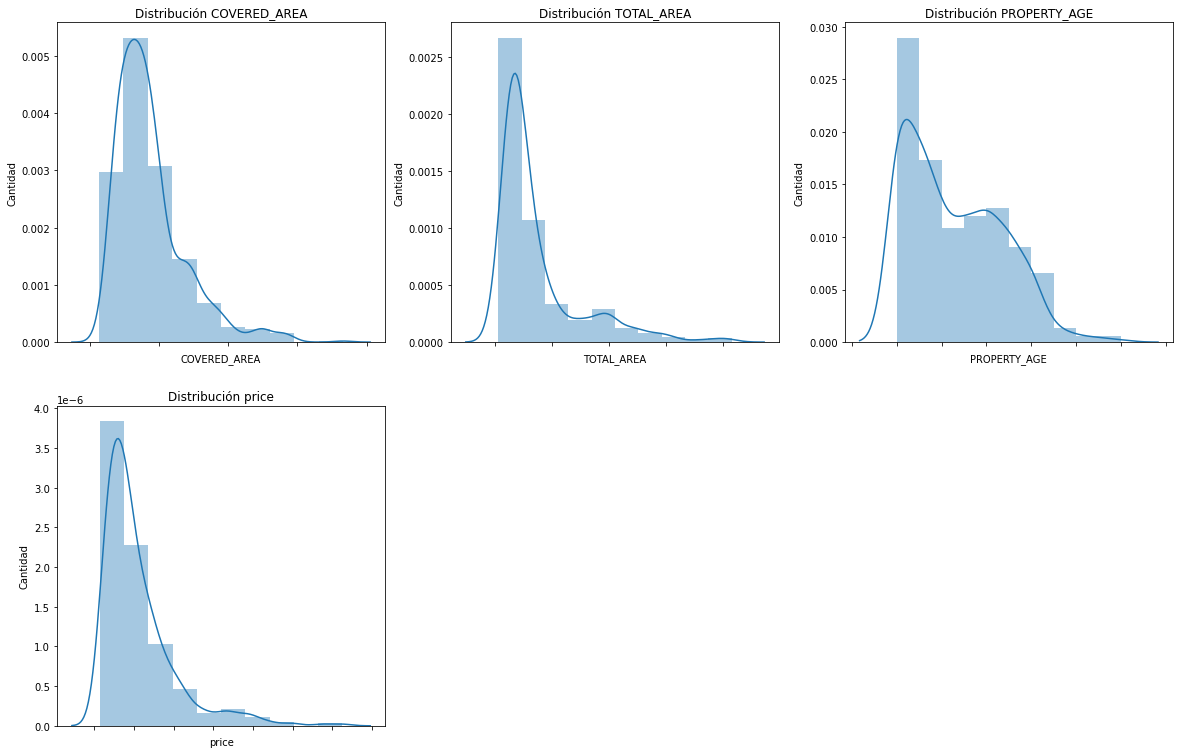

In [67]:
plt.figure(figsize=(20,20))
vars_to_plot = ['COVERED_AREA', 'TOTAL_AREA', 'PROPERTY_AGE','price']

for i, var in enumerate(vars_to_plot):
    plt.subplot(3,3,i+1) 
    value_counts = casas[var]
    ax=sns.distplot(value_counts,bins=10)
    title_string = "Distribución " + var
    plt.ylabel("Cantidad")
    plt.title(title_string)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

<AxesSubplot:xlabel='COVERED_AREA', ylabel='TOTAL_AREA'>

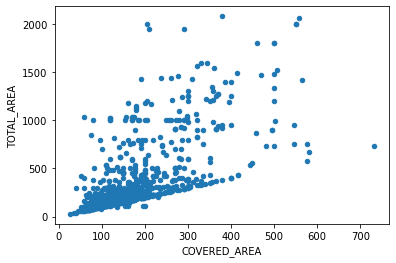

In [68]:
casas.plot.scatter('COVERED_AREA','TOTAL_AREA')

<AxesSubplot:xlabel='COVERED_AREA', ylabel='PROPERTY_AGE'>

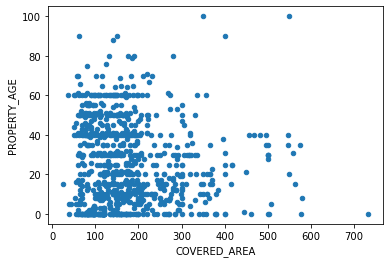

In [69]:
casas.plot.scatter('COVERED_AREA','PROPERTY_AGE')

<AxesSubplot:xlabel='COVERED_AREA', ylabel='price'>

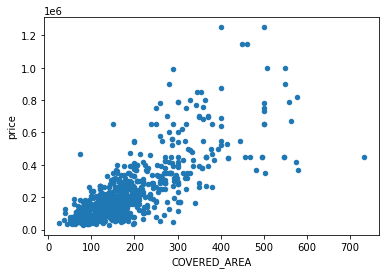

In [70]:
casas.plot.scatter('COVERED_AREA','price')

<AxesSubplot:xlabel='TOTAL_AREA', ylabel='PROPERTY_AGE'>

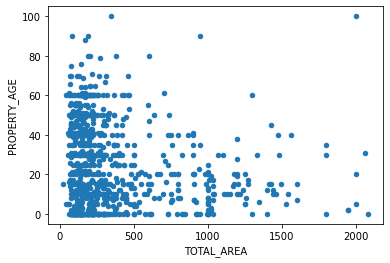

In [71]:
casas.plot.scatter('TOTAL_AREA','PROPERTY_AGE')

<AxesSubplot:xlabel='TOTAL_AREA', ylabel='price'>

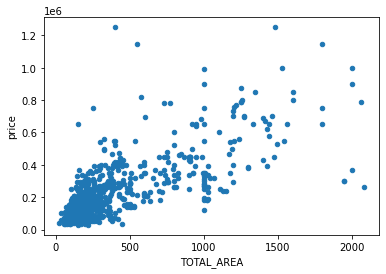

In [72]:
casas.plot.scatter('TOTAL_AREA','price')

<AxesSubplot:xlabel='PROPERTY_AGE', ylabel='price'>

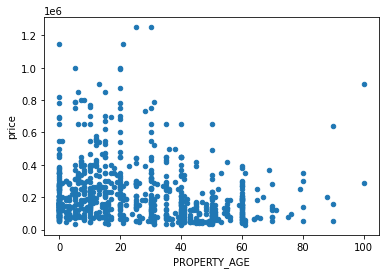

In [73]:
casas.plot.scatter('PROPERTY_AGE','price')

De los gráficos de dispersión bivariados se observó que, a diferencia de Cocheras, la superficie, es decir, tanto el área cubierta como el área total, presentaron una relación lineal respecto al precio.  

Entre área cubierta, o área total, y antigüedad, no se observó una relación lineal.

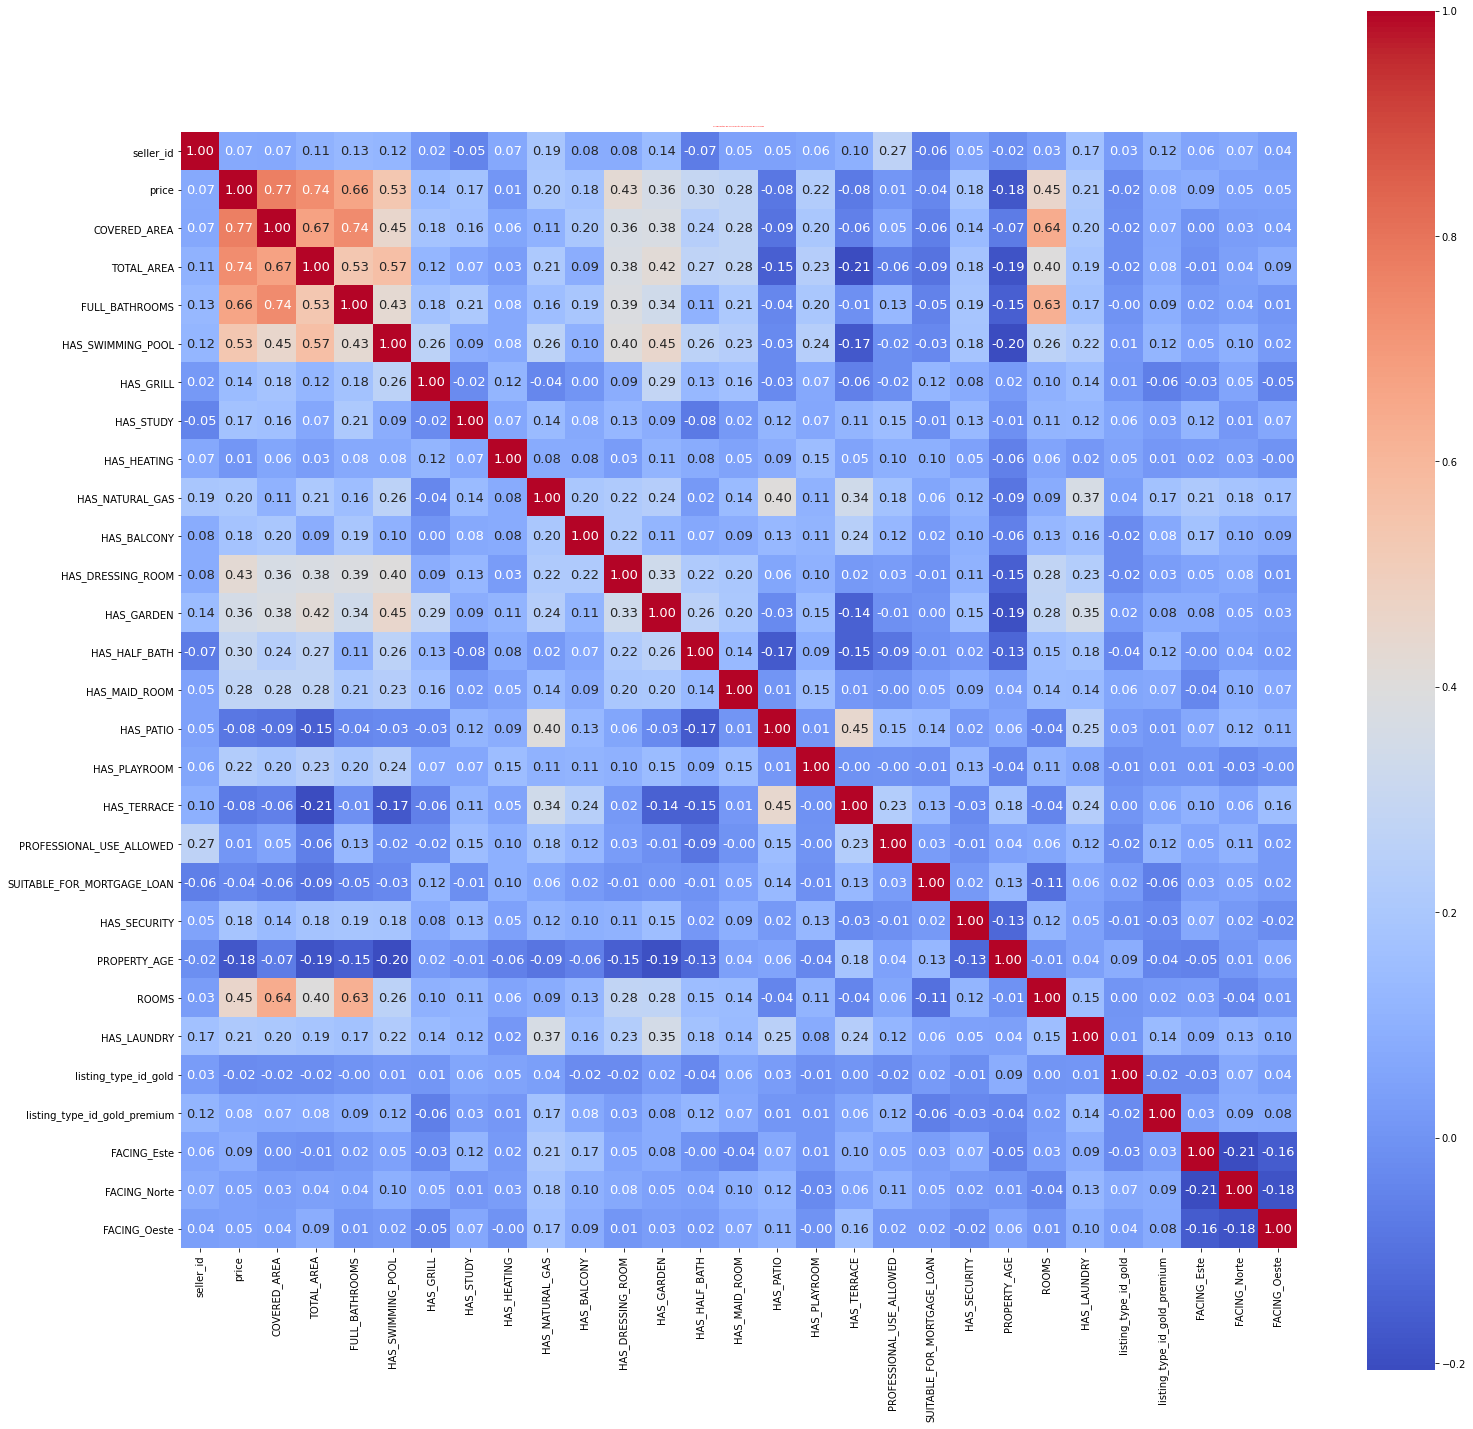

In [74]:
corrcasas = casas.corr()
plt.figure(figsize = (25,25))
sns.heatmap(corrcasas, cbar = True, square = True, annot = True, annot_kws={'size': 13}, fmt= '.2f', cmap= 'coolwarm')
plt.title("Coeficientes de correlación de Pearson para Casas", fontsize = 2, color = "r")

plt.show()

In [75]:
print("La correlación de las variables para Casas es...")
print(corrcasas, "\n")

La correlación de las variables para Casas es...
                              seller_id     price  COVERED_AREA  TOTAL_AREA  \
seller_id                      1.000000  0.073504      0.070939    0.106382   
price                          0.073504  1.000000      0.771907    0.736193   
COVERED_AREA                   0.070939  0.771907      1.000000    0.673827   
TOTAL_AREA                     0.106382  0.736193      0.673827    1.000000   
FULL_BATHROOMS                 0.129752  0.663215      0.739274    0.533978   
HAS_SWIMMING_POOL              0.121679  0.534098      0.453576    0.569368   
HAS_GRILL                      0.016738  0.143626      0.179833    0.119870   
HAS_STUDY                     -0.047620  0.172455      0.164553    0.066930   
HAS_HEATING                    0.067741  0.010194      0.060740    0.033933   
HAS_NATURAL_GAS                0.193230  0.199691      0.106523    0.205304   
HAS_BALCONY                    0.083803  0.177463      0.198827    0.089495   
HAS

Respecto a la correlación entre las distintas variables de Casas, se observa una correlación **fuerte y positiva** (superior al 60%) entre:

- Precio y área total,
- Precio y área cubierta,
- Total de baños y área cubierta,
- Área total y cubierta,
- Total de baños y precio,
- Ambientes y área cubierta,
- Ambientes y baños. 

Esto es esperable, ya que una propiedad con una superficie total mayor debería tener también mayor área cubierta, al igual que mayor precio. También es lógico que los baños sean proporcionales al área cubierta de la casa. En síntesis, se esperaría que una casa con un mayor área total tenga también mayor área cubierta, más ambientes, más dormitorios, y en consecuencia sea más costosa en relación a una casa de menores dimensiones.

In [76]:
comodidades_casas = pd.concat([casas['HAS_SWIMMING_POOL'].value_counts(normalize=True).mul(100),
                                casas['HAS_GRILL'].value_counts(normalize=True).mul(100),
                                casas['HAS_NATURAL_GAS'].value_counts(normalize=True).mul(100),
                                casas['HAS_BALCONY'].value_counts(normalize=True).mul(100),
                                casas['HAS_DRESSING_ROOM'].value_counts(normalize=True).mul(100),
                                casas['HAS_GARDEN'].value_counts(normalize=True).mul(100),
                                casas['HAS_TERRACE'].value_counts(normalize=True).mul(100),
                                casas['HAS_SECURITY'].value_counts(normalize=True).mul(100),
                                casas['HAS_LAUNDRY'].value_counts(normalize=True).mul(100)],
                                axis=1,keys=('Posee Pileta','Posee Parrilla',
                                    'Posee Gas Natural', 'Posee Balcón',
                                    'Posee Vestidor', 'Posee Jardín',
                                    'Posee Terraza', 'Posee Seguridad',
                                    'Posee Lavadero'))

comodidades_casas

,Posee Pileta,Posee Parrilla,Posee Gas Natural,Posee Balcón,Posee Vestidor,Posee Jardín,Posee Terraza,Posee Seguridad,Posee Lavadero
0.0,76.207303,72.084806,28.268551,85.747939,86.690224,51.236749,69.493522,95.170789,39.458186
1.0,23.792697,27.915194,71.731449,14.252061,13.309776,48.763251,30.506478,4.829211,60.541814


Respecto a las características de las Casas, un porcentaje levemente superior al 20% poseen pileta,  parrilla y balcón. La mayoría posee gas natural (80%), mientras que menos de un quinto de las casas poseen vestidor. Alrededor de un tercio posee jardín, la mitad terraza, dos tercios lavadero, y un porcentaje muy bajo seguridad (alrededor del 3%). 

# EDA Exclusivo para departamentos

In [77]:
deptos= data2[data2.category_id.eq("MLA401686")]

In [78]:
deptos.head()

,id,title,seller_id,category_id,price,currency_id,start_time,stop_time,condition,permalink,...,SUITABLE_FOR_MORTGAGE_LOAN,HAS_SECURITY,PROPERTY_AGE,ROOMS,HAS_LAUNDRY,listing_type_id_gold,listing_type_id_gold_premium,FACING_Este,FACING_Norte,FACING_Oeste
1,MLA883883503,Pte. Roca 1400 - Departamento Monoambiente En...,169964476,MLA401686,46600.0,USD,2020-10-14T19:06:55.000Z,2021-10-14T18:16:40.000Z,used,https://departamento.mercadolibre.com.ar/MLA-8...,...,0.0,0.0,1.0,0.0,0.0,0,0,1,0,0
2,MLA927458095,Venta Departamento 1 Dormitorios Frente - 2do ...,258695292,MLA401686,85900.0,USD,2021-06-28T20:56:41.000Z,2021-12-29T04:00:00.000Z,new,https://departamento.mercadolibre.com.ar/MLA-9...,...,0.0,0.0,0.0,1.0,0.0,0,0,0,0,1
7,MLA927711263,Departamento - Centro,653164955,MLA401686,115000.0,USD,2021-06-30T17:15:38.000Z,2021-12-31T04:00:00.000Z,new,https://departamento.mercadolibre.com.ar/MLA-9...,...,0.0,0.0,0.0,1.0,1.0,0,0,1,0,0
8,MLA899496739,1 Dormitorio Más Comodín Con Vista Al Río,680272458,MLA401686,180000.0,USD,2020-12-01T12:38:19.000Z,2021-08-29T22:23:22.000Z,new,https://departamento.mercadolibre.com.ar/MLA-8...,...,0.0,0.0,0.0,1.0,1.0,0,0,1,0,0
9,MLA909344482,Espectacular Dpto. 2 Dorm. Amplio Y Ventilado ...,521095123,MLA401686,125000.0,USD,2021-02-23T14:42:16.000Z,2021-11-01T02:15:33.000Z,used,https://departamento.mercadolibre.com.ar/MLA-9...,...,0.0,0.0,3.0,2.0,1.0,0,1,0,0,1


In [79]:
deptos[['COVERED_AREA', 'TOTAL_AREA', 'PROPERTY_AGE', 'price']].describe().T

,count,mean,std,min,25%,50%,75%,max
COVERED_AREA,4965.0,59.890391,36.224123,19.0,36.0,47.0,72.0,382.0
TOTAL_AREA,4965.0,68.250508,42.090634,19.0,40.0,54.0,80.0,382.0
PROPERTY_AGE,4965.0,5.544814,13.032326,0.0,0.0,0.0,2.0,100.0
price,4965.0,121838.269486,125410.317929,12000.0,57000.0,78000.0,126000.0,1850000.0


En este tipo de inmueble se observó que, en promedio, el precio de venta no superó a los USD 130.000. Hay departamentos que se publicaron a menos de USD 20.000, mientras que otros mostraron un precio superior al USD 1.000.000. Por otro lado, en promedio el área de cobertura resultó de 60 m2, mientras que la mitad de las casas tienen un área de cobertura cercano a los 50 m2. Respecto a la antiguedad, en promedio, oscilaron alrededor de los 5 años.

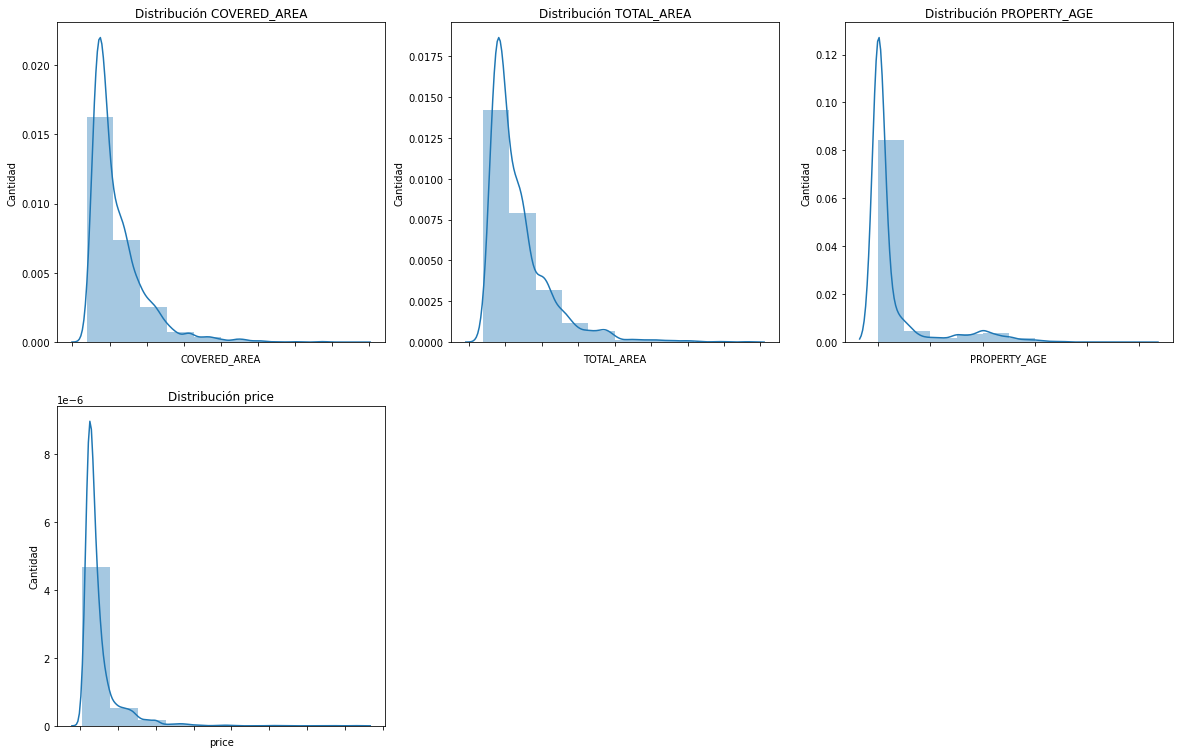

In [80]:
plt.figure(figsize=(20,20))
vars_to_plot = ['COVERED_AREA', 'TOTAL_AREA', 'PROPERTY_AGE','price']

for i, var in enumerate(vars_to_plot):
    plt.subplot(3,3,i+1) 
    value_counts = deptos[var]
    ax=sns.distplot(value_counts,bins=10)
    title_string = "Distribución " + var
    plt.ylabel("Cantidad")
    plt.title(title_string)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

Las distribuciones del área de cobertura y área total de los departamentos presentaron un comportamiento muy similar al de las casas.

<AxesSubplot:xlabel='COVERED_AREA', ylabel='TOTAL_AREA'>

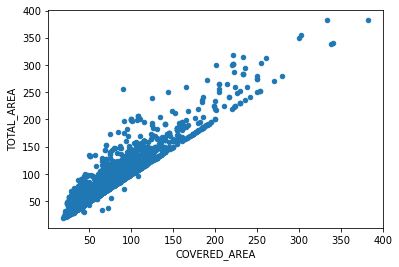

In [81]:
deptos.plot.scatter('COVERED_AREA','TOTAL_AREA')

<AxesSubplot:xlabel='COVERED_AREA', ylabel='PROPERTY_AGE'>

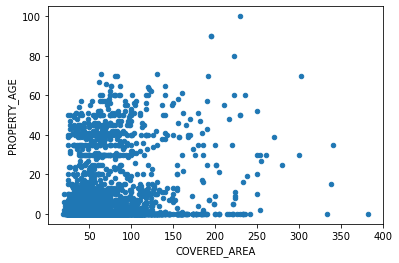

In [82]:
deptos.plot.scatter('COVERED_AREA','PROPERTY_AGE')

<AxesSubplot:xlabel='COVERED_AREA', ylabel='price'>

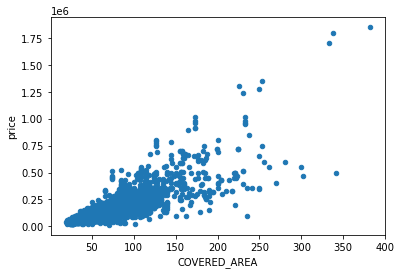

In [83]:
deptos.plot.scatter('COVERED_AREA','price')

<AxesSubplot:xlabel='TOTAL_AREA', ylabel='PROPERTY_AGE'>

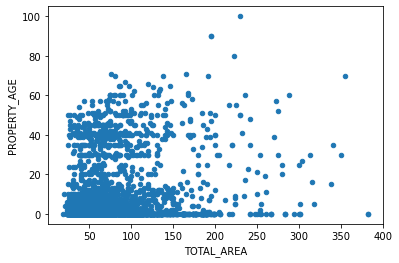

In [84]:
deptos.plot.scatter('TOTAL_AREA','PROPERTY_AGE')

<AxesSubplot:xlabel='TOTAL_AREA', ylabel='price'>

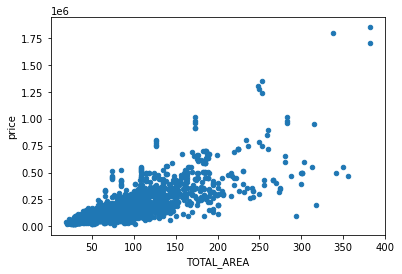

In [85]:
deptos.plot.scatter('TOTAL_AREA','price')

<AxesSubplot:xlabel='PROPERTY_AGE', ylabel='price'>

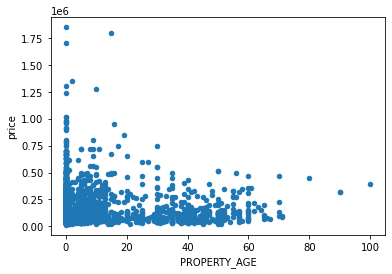

In [86]:
deptos.plot.scatter('PROPERTY_AGE','price')

Los gráficos de dispersión mostraron el mismo comportamiento que en el caso de las Casas. Se observaron patrones lineales entre el área cubierta, o área total, respecto al precio.

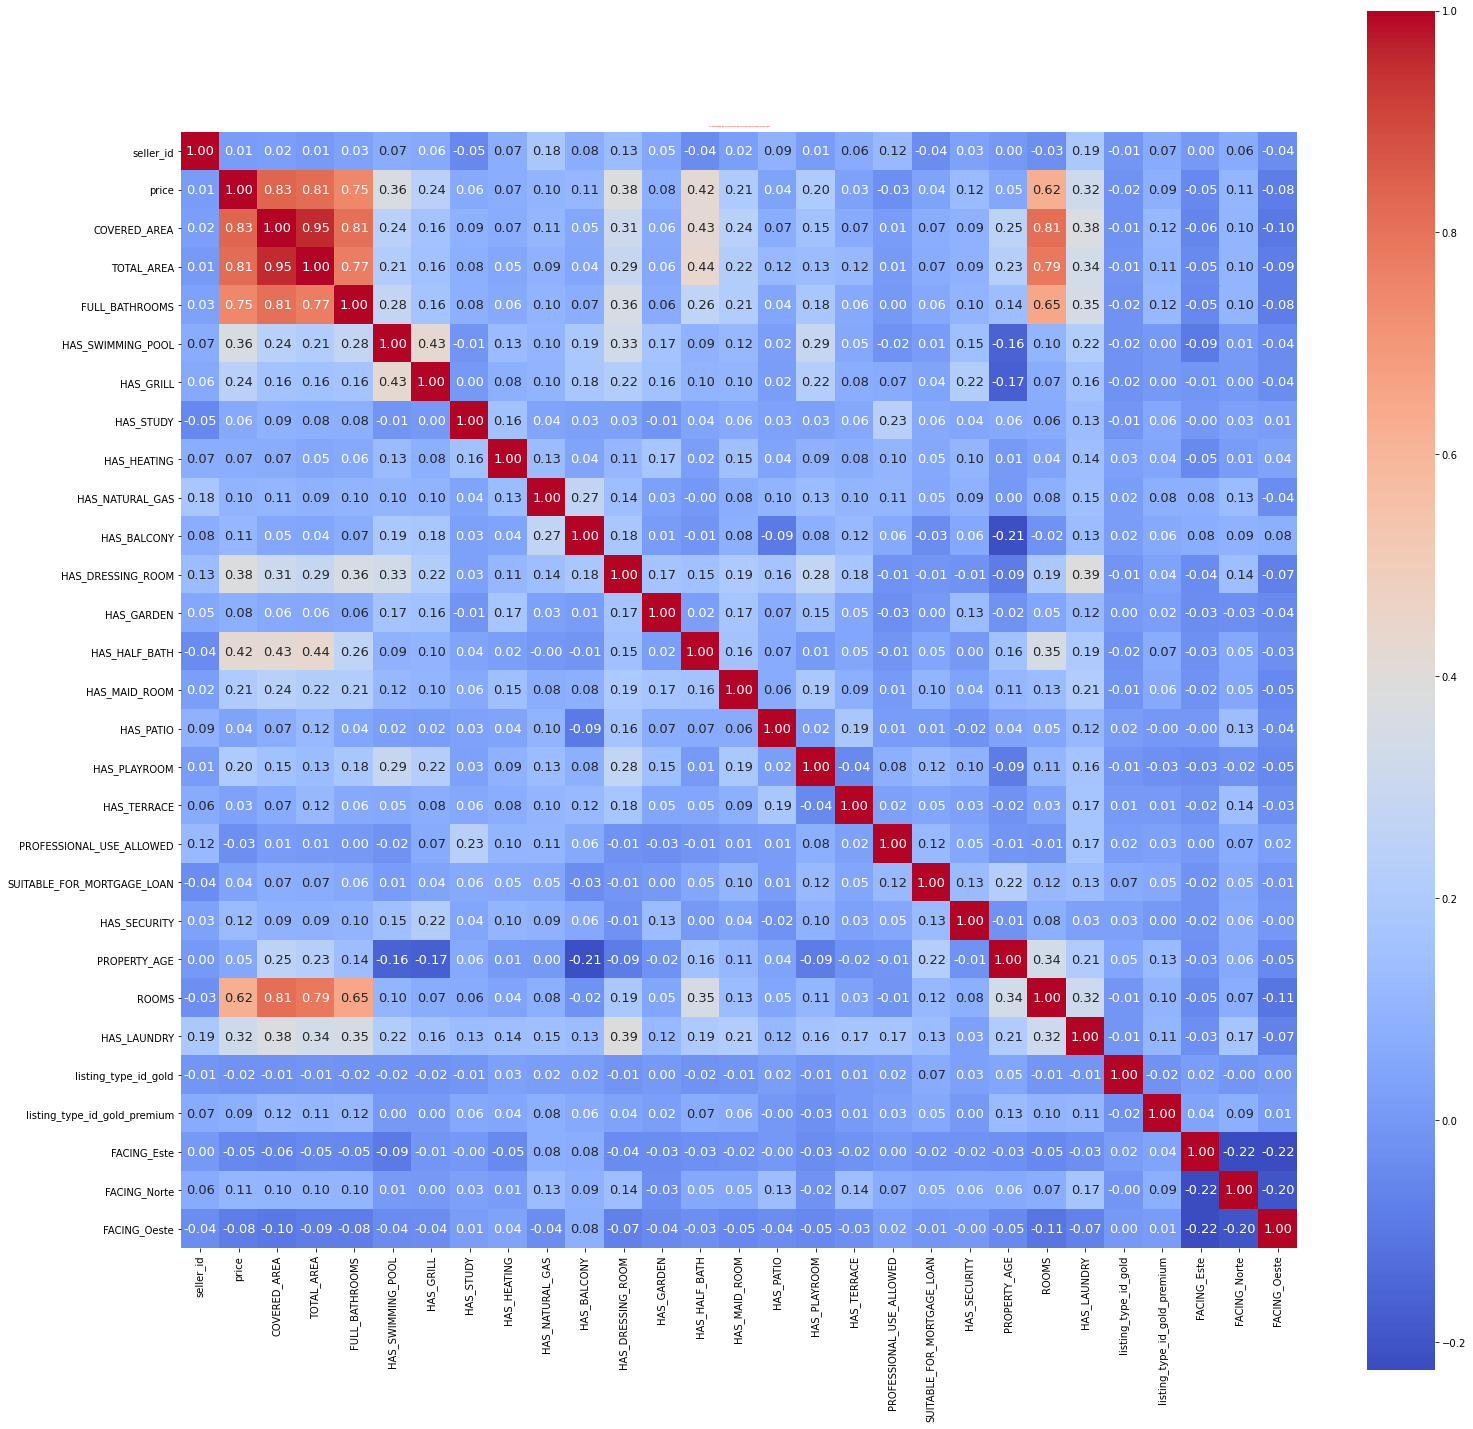

In [87]:
corrdeptos = deptos.corr()
plt.figure(figsize = (25,25))
sns.heatmap(corrdeptos, cbar = True, square = True, annot = True, annot_kws={'size': 13}, fmt= '.2f', cmap= 'coolwarm')
plt.title("Coeficientes de correlación de Pearson para Departamentos", fontsize = 2, color = "r")

plt.show()

In [88]:
print("La correlación de las variables para Departamentos es...")
print(corrdeptos, "\n")

La correlación de las variables para Departamentos es...
                              seller_id     price  COVERED_AREA  TOTAL_AREA  \
seller_id                      1.000000  0.013857      0.023325    0.007172   
price                          0.013857  1.000000      0.833131    0.813687   
COVERED_AREA                   0.023325  0.833131      1.000000    0.952603   
TOTAL_AREA                     0.007172  0.813687      0.952603    1.000000   
FULL_BATHROOMS                 0.028976  0.745505      0.806800    0.773599   
HAS_SWIMMING_POOL              0.071310  0.359822      0.235524    0.212125   
HAS_GRILL                      0.062142  0.241115      0.159832    0.156653   
HAS_STUDY                     -0.051638  0.060973      0.090536    0.083198   
HAS_HEATING                    0.074772  0.072290      0.068914    0.052167   
HAS_NATURAL_GAS                0.177938  0.096055      0.109958    0.091686   
HAS_BALCONY                    0.075016  0.113345      0.051806    0.04331

Respecto a la correlación entre las distintas variables de Departamentos, al igual que en Casas, se observa una correlación **fuerte y positiva** (superior al 60%) entre:

- Precio y área total,
- Precio y área cubierta,
- Total de baños y área cubierta,
- Área total y cubierta,
- Total de baños y precio,
- Ambientes y área cubierta,
- Ambientes y baños. 

Esto es esperable, ya que un departamento con una superficie total mayor debería tener también mayor área cubierta, al igual que mayor precio. También es lógico que los baños sean proporcionales al área cubierta de los departamentos. En síntesis, se esperaría que un departamento con un mayor área total tenga también mayor área cubierta, más ambientes, más baños, y en consecuencia sea más costosa en relación a un departamento de menores dimensiones.
Es muy interesante la alta correlacion entre precio y area cubierta; sólo con esa variable tenemos una correlacion muy alta.

In [89]:
Amenities_deptos = pd.concat([deptos['HAS_SWIMMING_POOL'].value_counts(normalize=True).mul(100),
                        deptos['HAS_GRILL'].value_counts(normalize=True).mul(100),
                        deptos['HAS_NATURAL_GAS'].value_counts(normalize=True).mul(100),
                        deptos['HAS_BALCONY'].value_counts(normalize=True).mul(100),
                        deptos['HAS_DRESSING_ROOM'].value_counts(normalize=True).mul(100),
                        deptos['HAS_GARDEN'].value_counts(normalize=True).mul(100),
                        deptos['HAS_TERRACE'].value_counts(normalize=True).mul(100),
                        deptos['HAS_SECURITY'].value_counts(normalize=True).mul(100),
                        deptos['HAS_LAUNDRY'].value_counts(normalize=True).mul(100)],
                        axis=1,keys=('Posee Pileta','Posee Parrilla',
                            'Posee Gas Natural', 'Posee Balcón',
                            'Posee Vestidor', 'Posee Jardín',
                            'Posee Terraza', 'Posee Seguridad',
                            'Posee Lavadero'))

Amenities_deptos

,Posee Pileta,Posee Parrilla,Posee Gas Natural,Posee Balcón,Posee Vestidor,Posee Jardín,Posee Terraza,Posee Seguridad,Posee Lavadero
0.0,77.240685,70.231621,29.063444,28.036254,87.713998,96.817724,82.819738,91.903323,69.808661
1.0,22.759315,29.768379,70.936556,71.963746,12.286002,3.182276,17.180262,8.096677,30.191339


Respecto a los amenities de los departamentos publicados, menos de un cuarto de los departamentos poseen pileta, mientras que una proporción levemente superior posee parrilla. Respecto al gas natural y al balcón, alrededor del 70% de los departamentos poseen ambas cualidades. Menos del 15% posee vestidor, mientras que un porcentaje cercano pero superior posee terraza. Una proporción ínfima (en torno al 3%) posee jardín, siendo esto lógico por tratarse de departamentos. Alrededor del 10% posee seguridad (pudiendo ser cámaras como vigilancia permanente), mientras que casi un tercio posee lavadero.

# Parte 3 - Construcción de un modelo predictivo para predecir el valor de venta de los inmuebles

Definido el dataset, y realizado un primer acercamiento al mismo a través de un análisis EDA sectorizado (según se trate de Casas, Departamentos o Cocheras), se procedió a la construcción de distintos modelos predictivos, a los fines de encontrar aquel que sea capaz de predecir, con la mayor exactitud posible, el precio de venta de los inmuebles.

In [90]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error 

## Departamentos

En primera instancia, se procedió a la modelización de inmuebles de tipo Departamentos. 

Para ello, se limpió el dataset, conservando sólo las variables numéricas.

In [91]:
def clean_dataset(deptos):
    assert isinstance(deptos, pd.DataFrame) 
    deptos.dropna(inplace=True)
    indices_to_keep = ~deptos.isin([np.nan, np.inf, -np.inf]).any(1)
    return deptos[indices_to_keep].astype(np.float64)

In [92]:
seleccion = deptos.select_dtypes(include = ["int16", "int32", "int64", "float16", "float32","uint8", "float64"])
seleccion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4965 entries, 1 to 8259
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   seller_id                     4965 non-null   int64  
 1   price                         4965 non-null   float64
 2   COVERED_AREA                  4965 non-null   float64
 3   TOTAL_AREA                    4965 non-null   float64
 4   FULL_BATHROOMS                4965 non-null   float64
 5   HAS_SWIMMING_POOL             4965 non-null   float64
 6   HAS_GRILL                     4965 non-null   float64
 7   HAS_STUDY                     4965 non-null   float64
 8   HAS_HEATING                   4965 non-null   float64
 9   HAS_NATURAL_GAS               4965 non-null   float64
 10  HAS_BALCONY                   4965 non-null   float64
 11  HAS_DRESSING_ROOM             4965 non-null   float64
 12  HAS_GARDEN                    4965 non-null   float64
 13  HAS

Se estableció la variable a predecir (y), el precio de las propiedades, y las variables predictoras (las restantes numéricas, x<sub>i</sub>).

Posteriormente, se dividió el dataset entre train (80%) y test (20%). 

In [93]:
X = seleccion.iloc[:, 2:].values
y = seleccion.iloc[:, 1].values

In [94]:
print(seleccion.shape)
seleccion.head()

(4965, 29)


,seller_id,price,COVERED_AREA,TOTAL_AREA,FULL_BATHROOMS,HAS_SWIMMING_POOL,HAS_GRILL,HAS_STUDY,HAS_HEATING,HAS_NATURAL_GAS,...,SUITABLE_FOR_MORTGAGE_LOAN,HAS_SECURITY,PROPERTY_AGE,ROOMS,HAS_LAUNDRY,listing_type_id_gold,listing_type_id_gold_premium,FACING_Este,FACING_Norte,FACING_Oeste
1,169964476,46600.0,25.0,25.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0,0,1,0,0
2,258695292,85900.0,42.0,53.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0,0,0,0,1
7,653164955,115000.0,42.0,46.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0,0,1,0,0
8,680272458,180000.0,71.0,71.0,2.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0,0,1,0,0
9,521095123,125000.0,65.0,70.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,3.0,2.0,1.0,0,1,0,0,1


In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3972, 27)
(993, 27)
(3972,)
(993,)


### Regresion Lineal 

Para comenzar con el análisis propiamente dicho, se aplicó un modelo de regresión lineal múltiple. Si bien, teóricamente, deberían cumplirse una serie de supuestos para que esta técnica sea correctamente aplicada; por su simplicidad se entendió como una buena aproximación inicial al problema.

Además, teniendo en cuenta que el objetivo a abordar es un "problema de negocio" y no una cuestión meramente académica, la relevancia de la técnica a los fines del presente análisis radicó en la capacidad de predicción más que en el cumplimiento de los supuestos.

In [96]:
#Regresion Lineal Simple - Entrenamiento
from sklearn.linear_model import LinearRegression #Llamo el modelo
regressorRL = LinearRegression() #Creo el modelo
regressorRL.fit(X_train, y_train) #Entreno el modelo

# Regresión Lineal - Validación test set
y_pred_RL = regressorRL.predict(X_test)

# Regresión Lineal - Accuaracy
from sklearn.metrics import r2_score
print('R2 para Regresión Lineal:')
R2RL = r2_score(y_test, y_pred_RL)
print(R2RL)
predicciones=pd.DataFrame(y_test, y_pred_RL)

from math import sqrt
#Regresión Lineal - medidas de error
RMSE_RL= sqrt(np.mean((y_test - y_pred_RL)**2))
mae_RL= np.mean(abs(y_pred_RL - y_test))
MAPE_RL = np.mean((abs(y_test - y_pred_RL))/y_test)
SMAPE_RL = sum(abs(y_test - y_pred_RL))/sum(y_test + y_pred_RL)

RL = [R2RL,RMSE_RL,mae_RL,MAPE_RL,SMAPE_RL]
print(RL)

R2 para Regresión Lineal:
0.7289958940681363
[0.7289958940681363, 56585.263325284126, 33660.75952927051, 0.3197703910018263, 0.14157428433993974]


Los resultados indican que el R2 (coeficiente de determinación) para los departamentos resultó superior al 70%. Esto significa que más del 70% de la varianza total fue explicada por el modelo de regresión, lo cual, en primera instancia, da indicios de un buen ajuste.

### Gradient Boosting Machine

En segunda instancia, se utilizó el algoritmo de Gradient Boosting Machine, aplicando la técnica de árboles de decisión. 

Las principales ventajas se relacionan con que es capaz de seleccionar predictores de forma automática, pueden aplicarse a problemas de regresión y clasificación, y manejar tanto predictores numéricos como categóricos sin tener que crear variables dummy o one-hot-encoding (en la práctica, esto último depende de la implementación del algoritmo que tenga cada librería).

Al tratarse de métodos no paramétricos, no es necesario que se cumpla ningún tipo de distribución específica.

Por lo general, requieren mucha menos limpieza y pre procesado de los datos en comparación a otros métodos de aprendizaje estadístico (por ejemplo, no requieren estandarización), a la vez que tampoco se ven muy influenciados por outliers.

Son muy útiles en la exploración de datos, ya que permiten identificar de forma rápida y eficiente las variables (predictores) más importantes.

Finalmente, cabe mencionar que tienen buena escalabilidad, pueden aplicarse a conjuntos de datos con un elevado número de observaciones.

In [97]:
from sklearn.ensemble import GradientBoostingRegressor #Llamo el modelo
gradient_boosted = GradientBoostingRegressor() #Creo el modelo
gradient_boosted.fit(X_train, y_train) #Entreno el modelo

predictionsGB = gradient_boosted.predict(X_test)

print('R2 para Gradient Boosting Machine:')
R2GB= r2_score(y_test, predictionsGB) 
print(R2GB)

RMSE_GB= sqrt(np.mean((y_test - predictionsGB)**2))
mae_GB= np.mean(abs(predictionsGB - y_test))
MAPE_GB = np.mean((abs(y_test - predictionsGB))/y_test)
SMAPE_GB = sum(abs(y_test - predictionsGB))/sum(y_test + predictionsGB)

GB = [R2GB,RMSE_GB,mae_GB,MAPE_GB,SMAPE_GB]
print(GB)

R2 para Gradient Boosting Machine:
0.8167627039364623
[0.8167627039364623, 46528.8526121724, 25239.90246234092, 0.2168520018821805, 0.10665409835778701]


Se efectuó una validación cruzada con 10 grupos aleatorios,

In [100]:
from sklearn.model_selection import KFold,cross_val_score
scores = cross_val_score(gradient_boosted, X, y, cv=10)
print("Cross-validation scores: {}".format(scores))
print("Varianza scores Gardient Boosting: {:.2f}".format(np.var(scores)))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.64993108 0.87970432 0.86073392 0.90085997 0.86610978 0.85984414
 0.8413002  0.84197576 0.76211137 0.90203516]
Varianza scores Gardient Boosting: 0.01
Average cross-validation score: 0.84


Y se utilizó el método grid search para obtener los mejores parámetros para el modelo bajo estudio, dentro del rango determinado. 

In [101]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
clf = GradientBoostingRegressor()
parametros = {
    'learning_rate': [0.01,0.1, 0.3],
    'max_depth': [9,12],
    'max_features': [2, 3,4],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [1,2, 4],
    'n_estimators': [200, 300, 400]
}

r2 = make_scorer(r2_score)
grid_res = GridSearchCV(clf, parametros, verbose=0, cv=10, scoring = r2, return_train_score=True)
grid_res.fit(X_train, y_train)


predictionsGB1 = grid_res.predict(X_test)
R2=grid_res.best_score_
print(grid_res.best_score_)
RMSE_GB1= sqrt(np.mean((y_test - predictionsGB1)**2))
mae_GB1= np.mean(abs(predictionsGB1 - y_test))
MAPE_GB1 = np.mean((abs(y_test - predictionsGB1))/y_test)
SMAPE_GB1 = sum(abs(y_test - predictionsGB1))/sum(y_test + predictionsGB1)
GBconGridSearch = [R2,RMSE_GB1,mae_GB1,MAPE_GB1,SMAPE_GB1]
print (GBconGridSearch)

0.8820415244559296
[0.8820415244559296, 38944.962853177116, 19742.798076254596, 0.17794696721138042, 0.08320804365255789]


In [102]:
print("Los mejores parámetros para gradient boosting son:")
print(grid_res.best_params_)

Los mejores parámetros para gradient boosting son:
{'learning_rate': 0.1, 'max_depth': 12, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 400}


In [103]:
a = seleccion.columns
a = list(a)

In [104]:
b=a[2:] 

A continuación se visualizó, en orden de importancia, la influencia de cada una de las variables predictoras sobre el precio de los departamentos.

In [105]:
 print("Porcentaje de Influencia de cada variable")
for name, importance in zip(b, gradient_boosted.feature_importances_):     
    print(name, "=", round(importance*100))

Porcentaje de Influencia de cada variable
COVERED_AREA = 64
TOTAL_AREA = 19
FULL_BATHROOMS = 5
HAS_SWIMMING_POOL = 5
HAS_GRILL = 0
HAS_STUDY = 0
HAS_HEATING = 0
HAS_NATURAL_GAS = 0
HAS_BALCONY = 0
HAS_DRESSING_ROOM = 1
HAS_GARDEN = 0
HAS_HALF_BATH = 1
HAS_MAID_ROOM = 0
HAS_PATIO = 0
HAS_PLAYROOM = 0
HAS_TERRACE = 0
PROFESSIONAL_USE_ALLOWED = 0
SUITABLE_FOR_MORTGAGE_LOAN = 0
HAS_SECURITY = 0
PROPERTY_AGE = 4
ROOMS = 0
HAS_LAUNDRY = 0
listing_type_id_gold = 0
listing_type_id_gold_premium = 0
FACING_Este = 0
FACING_Norte = 0
FACING_Oeste = 0


El análisis mediante Gradient Boosting Machine arrojó como las variables de mayor importancia, en cuanto a influencia sobre el precio de los departamentos, a 'COVERED_AREA' y 'TOTAL_AREA'. Entre las dos explican alrededor del 80% del precio de las casas.

 ### Random Forest

Random Forest, al igual que Gradient Boosting Machine, es un algoritmo perteneciente a la familia de los árboles. Se trata de una combinación de árboles predictores independientes, que posean la misma distribución, tal que cada uno (de manera individual) presente ruido, pero el mismo quede compensado a través de la combinación de gran cantidad de árboles de decisión.

Al igual que en el caso anterior, el análisis comenzó con el entrenamiento del modelo. 

In [106]:
from sklearn.ensemble import RandomForestRegressor #Llamo el modelo
regressorRF = RandomForestRegressor() #Creo el modelo
regressorRF.fit(X_train, y_train) #Entreno el modelo

y_pred_RF= regressorRF.predict(X_test)

print('R2 para Random Forest:')
R2RF=r2_score(y_test, y_pred_RF)
print(R2RF)

RMSE_RF= sqrt(np.mean((y_test - y_pred_RF)**2))
mae_RF= np.mean(abs(y_pred_RF - y_test))
MAPE_RF = np.mean((abs(y_test - y_pred_RF))/y_test)
SMAPE_RF = sum(abs(y_test - y_pred_RF))/sum(y_test + y_pred_RF)

RF = [R2RF,RMSE_RF, mae_RF,MAPE_RF,SMAPE_RF]

R2 para Random Forest:
0.8700800697233679


Se obtuvieron los parámetros por defecto para el modelo,

Se utilizó el método de cross validation con 10 grupos aleatorios,

In [107]:
from sklearn.model_selection import KFold,cross_val_score
scoresRF = cross_val_score(regressorRF, X, y, cv=10)
print("Cross-validation scores Random Forest: {}".format(scoresRF))
print("Media Scores Random Forest: {:.2f}".format(scoresRF.mean()))
print("Varianza scores Random Forest: {:.2f}".format(np.var(scoresRF)))
print(RF)

Cross-validation scores Random Forest: [0.67456543 0.92782775 0.845209   0.92743347 0.88236808 0.90882511
 0.86828314 0.8597532  0.7284856  0.90769066]
Media Scores Random Forest: 0.85
Varianza scores Random Forest: 0.01
[0.8700800697233679, 39178.995339195564, 19791.44072112527, 0.17317897085752593, 0.08320101388517638]


Se realizó una búsqueda mediante Grid Search para encontrar los hiperparámetros óptimos,

In [108]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
clf = RandomForestRegressor()
parametros = {
    'bootstrap': [True],
    'max_depth': [80, 190],
    'max_features': [2, 14],
    'min_samples_leaf': [1,5],
    'min_samples_split': [3, 12],
    'n_estimators': [200, 290]
}

r2 = make_scorer(r2_score)
grid_res = GridSearchCV(clf, parametros, verbose=0, cv=10, scoring = r2, return_train_score=True)
grid_res.fit(X, y)
predictionsRF2 = grid_res.predict(X_test)

R2=grid_res.best_score_
print(grid_res.best_score_)
RMSE_RF2= sqrt(np.mean((y_test - predictionsRF2)**2))
mae_RF2= np.mean(abs(predictionsRF2 - y_test))
MAPE_RF2 = np.mean((abs(y_test - predictionsRF2))/y_test)
SMAPE_RF2 = sum(abs(y_test - predictionsRF2))/sum(y_test + predictionsRF2)
RFconGridSearch = [R2,RMSE_RF2,mae_RF2,MAPE_RF2,SMAPE_RF2]
print (RFconGridSearch)




0.8674320361767647
[0.8674320361767647, 16679.059858471977, 8550.135579765292, 0.07604357736920382, 0.036122095765397245]


Se aplicó nuevamente el algoritmo de Random Forest con los hiperparámetros óptimos, de acuerdo a la búsqueda realizada anteriormente.

A continuación, se listaron las características más representativas para el mejor modelo de Random Forest encontrado. 

In [110]:
for name, importance in zip(b, regressorRF.feature_importances_):
    print(name, "=", importance)

COVERED_AREA = 0.6789659977534502
TOTAL_AREA = 0.1449520449084644
FULL_BATHROOMS = 0.023889437482168666
HAS_SWIMMING_POOL = 0.0459216318894779
HAS_GRILL = 0.003590174335001959
HAS_STUDY = 0.0005533413962192025
HAS_HEATING = 0.0020476326698080013
HAS_NATURAL_GAS = 0.002872686380768349
HAS_BALCONY = 0.005505545836315693
HAS_DRESSING_ROOM = 0.0077747825103098
HAS_GARDEN = 0.0009339763742533237
HAS_HALF_BATH = 0.004435244805577105
HAS_MAID_ROOM = 0.001987842275965105
HAS_PATIO = 0.001948909548457084
HAS_PLAYROOM = 0.002444117441984491
HAS_TERRACE = 0.002412840975420943
PROFESSIONAL_USE_ALLOWED = 0.0008262594714411345
SUITABLE_FOR_MORTGAGE_LOAN = 0.0008800043807887898
HAS_SECURITY = 0.0018864911633187605
PROPERTY_AGE = 0.03890718004272387
ROOMS = 0.010648009465129057
HAS_LAUNDRY = 0.0024296540859429744
listing_type_id_gold = 2.874504474229177e-05
listing_type_id_gold_premium = 0.0041094298157617545
FACING_Este = 0.0022796974162714286
FACING_Norte = 0.005413509615808724
FACING_Oeste = 0.0023

El método de Random Forest mostró que las variables más influyentes en la determinación del precio de los departamentos son 'COVERED_AREA', 'TOTAL_AREA' y 'FULL_BATHROOMS'. Entre las tres explican más del 60% del precio de los departamentos, con una importancia balanceada.

Finalizando con el análisis de Departamentos, en el siguiente cuadro se encuentran las medidas de ajuste de las tres técnicas aplicadas (Regresión Lineal Múltiple, Random Forest y Gradient Boosting) para las predicción del precio de los Departamentos.

In [112]:
total = [RL, RF,RFconGridSearch, GB, GBconGridSearch]
index =["Regresión Lineal", "Random Forest","RFconGridSearch", "Gradient Bosting Machine","GBconGridSearch"]
cols = ["R2", "RMSE", "MAE", "MAPE", "SMAPE"]
MedError= pd.DataFrame(total, columns=cols, index=index)
MedError

,R2,RMSE,MAE,MAPE,SMAPE
Regresión Lineal,0.728996,56585.263325,33660.759529,0.319770,0.141574
Random Forest,0.870080,39178.995339,19791.440721,0.173179,0.083201
RFconGridSearch,0.867432,16679.059858,8550.135580,0.076044,0.036122
Gradient Bosting Machine,0.816763,46528.852612,25239.902462,0.216852,0.106654
GBconGridSearch,0.882042,38944.962853,19742.798076,0.177947,0.083208


## Casas

Al igual que para Departamentos, se procedió al desarrollo de distintos modelos para encontrar el que mejor prediga el precio para Casas. 

Para ello, se creó un dataset que contenga sólo las variables numéricas.

In [113]:
def clean_dataset(casas):
    assert isinstance(casas, pd.DataFrame) 
    casas.dropna(inplace=True)
    indices_to_keep = ~casas.isin([np.nan, np.inf, -np.inf]).any(1)
    return casas[indices_to_keep].astype(np.float64)

In [114]:
seleccioncasas = casas.select_dtypes(include = ["int16", "int32", "int64", "float16", "float32","uint8", "float64"])
seleccioncasas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 849 entries, 4 to 8249
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   seller_id                     849 non-null    int64  
 1   price                         849 non-null    float64
 2   COVERED_AREA                  849 non-null    float64
 3   TOTAL_AREA                    849 non-null    float64
 4   FULL_BATHROOMS                849 non-null    float64
 5   HAS_SWIMMING_POOL             849 non-null    float64
 6   HAS_GRILL                     849 non-null    float64
 7   HAS_STUDY                     849 non-null    float64
 8   HAS_HEATING                   849 non-null    float64
 9   HAS_NATURAL_GAS               849 non-null    float64
 10  HAS_BALCONY                   849 non-null    float64
 11  HAS_DRESSING_ROOM             849 non-null    float64
 12  HAS_GARDEN                    849 non-null    float64
 13  HAS_

Se dividió el dataset entre las variables a predecir y las predictoras, y posteriormente se estableció un 80% del dataset para train y un 20% del mismo para test.

In [115]:
X = seleccioncasas.iloc[:, 2:].values
y = seleccioncasas.iloc[:, 1].values

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(679, 27)
(170, 27)
(679,)
(170,)


### Regresion Lineal

In [117]:
#Regresion Lineal Simple - Entrenamiento
from sklearn.linear_model import LinearRegression #Llamo el modelo
regressorRL = LinearRegression() #Creo el modelo
regressorRL.fit(X_train, y_train) #Entreno el modelo

# Regresión Lineal - Validación test set
y_pred_RL = regressorRL.predict(X_test)

# Regresión Lineal - Accuaracy
from sklearn.metrics import r2_score
print('R2 para Regresión Lineal:')
R2RL = r2_score(y_test, y_pred_RL)
print(R2RL)
predicciones=pd.DataFrame(y_test, y_pred_RL)

from math import sqrt
#Regresión Lineal - medidas de error
RMSE_RL= sqrt(np.mean((y_test - y_pred_RL)**2))
mae_RL= np.mean(abs(y_pred_RL - y_test))
MAPE_RL = np.mean((abs(y_test - y_pred_RL))/y_test)
SMAPE_RL = sum(abs(y_test - y_pred_RL))/sum(y_test + y_pred_RL)

RL = [R2RL,RMSE_RL,mae_RL,MAPE_RL,SMAPE_RL]
print(RL)

R2 para Regresión Lineal:
0.7033993267204048
[0.7033993267204048, 100618.34970307248, 67380.64525424044, 0.4063918168936539, 0.15223598098045052]


### Gradient Boosting Machine

In [118]:
from sklearn.ensemble import GradientBoostingRegressor #Llamo el modelo
gradient_boosted = GradientBoostingRegressor() #Creo el modelo
gradient_boosted.fit(X_train, y_train) #Entreno el modelo

predictionsGB = gradient_boosted.predict(X_test)

print('R2 para Gradient Boosting Machine:')
R2GB= r2_score(y_test, predictionsGB) 
print(R2GB)

RMSE_GB= sqrt(np.mean((y_test - predictionsGB)**2))
mae_GB= np.mean(abs(predictionsGB - y_test))
MAPE_GB = np.mean((abs(y_test - predictionsGB))/y_test)
SMAPE_GB = sum(abs(y_test - predictionsGB))/sum(y_test + predictionsGB)

GB = [R2GB,RMSE_GB,mae_GB,MAPE_GB,SMAPE_GB]
print(GB)

R2 para Gradient Boosting Machine:
0.6814686261161795
[0.6814686261161795, 104271.88653711698, 65009.620624674746, 0.360746484899631, 0.1485244732002866]


Se efectuó una validación cruzada con 10 grupos aleatorios,

In [119]:
from sklearn.model_selection import KFold,cross_val_score
scores = cross_val_score(gradient_boosted, X, y, cv=10)
print("Cross-validation scores: {}".format(scores))
print("Varianza scores Gardient Boosting: {:.2f}".format(np.var(scores)))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.6227272  0.61920043 0.53070854 0.76030808 0.76081961 0.77860215
 0.77635481 0.70607254 0.62382346 0.74877082]
Varianza scores Gardient Boosting: 0.01
Average cross-validation score: 0.69


Se obtuvieron los parámetros por default del modelo,

Y se utilizó el método grid search para obtener los mejores parámetros para el modelo bajo estudio, dentro del rango determinado. 

In [120]:
clf = GradientBoostingRegressor()
parametros = {
    'learning_rate': [0.1, 0.5, 1],
    'max_depth': [3, 6, 9],
    'max_features': [0, 3],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [100, 200, 300, 1000]
}

r2 = make_scorer(r2_score)
grid_res = GridSearchCV(clf, parametros, verbose=0, cv=10, scoring = r2, return_train_score=True)
grid_res.fit(X_train, y_train)


predictionsGB1 = grid_res.predict(X_test)
R2=grid_res.best_score_
print(grid_res.best_score_)
RMSE_GB1= sqrt(np.mean((y_test - predictionsGB1)**2))
mae_GB1= np.mean(abs(predictionsGB1 - y_test))
MAPE_GB1 = np.mean((abs(y_test - predictionsGB1))/y_test)
SMAPE_GB1 = sum(abs(y_test - predictionsGB1))/sum(y_test + predictionsGB1)
GBconGridSearch = [R2,RMSE_GB1,mae_GB1,MAPE_GB1,SMAPE_GB1]
print (GBconGridSearch)

0.7335489936229492
[0.7335489936229492, 98413.1525798612, 63695.71958924762, 0.357328271237383, 0.14458944966675516]


In [121]:
print("Los mejores parámetros para gradient boosting son:")
print(grid_res.best_params_)

Los mejores parámetros para gradient boosting son:
{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


Se corrió nuevamente el algoritmo con los hiperparámetros óptimos, de acuerdo a la búsqueda realizada con el método Grid Search.

In [122]:
a = seleccion.columns
a = list(a)

In [123]:
b=a[2:]

A continuación se visualizó, en orden de importancia, la influencia de cada una de las variables predictoras sobre el precio de los departamentos.

In [124]:
 print("Porcentaje de Influencia de cada variable")
for name, importance in zip(b, gradient_boosted.feature_importances_):     
    print(name, "=", round(importance*100))

Porcentaje de Influencia de cada variable
COVERED_AREA = 58
TOTAL_AREA = 23
FULL_BATHROOMS = 4
HAS_SWIMMING_POOL = 2
HAS_GRILL = 0
HAS_STUDY = 1
HAS_HEATING = 0
HAS_NATURAL_GAS = 0
HAS_BALCONY = 0
HAS_DRESSING_ROOM = 1
HAS_GARDEN = 2
HAS_HALF_BATH = 1
HAS_MAID_ROOM = 0
HAS_PATIO = 0
HAS_PLAYROOM = 0
HAS_TERRACE = 0
PROFESSIONAL_USE_ALLOWED = 0
SUITABLE_FOR_MORTGAGE_LOAN = 0
HAS_SECURITY = 0
PROPERTY_AGE = 3
ROOMS = 2
HAS_LAUNDRY = 0
listing_type_id_gold = 0
listing_type_id_gold_premium = 0
FACING_Este = 1
FACING_Norte = 0
FACING_Oeste = 0


Gradient Boosting Machine arrojó que las variables que más influyeron en el precio de las casas, nuevamente, han sido 'COVERED_AREA' y 'TOTAL_AREA', explicando más del 80% del precio de las mismas.

### Random Forest

El análisis comenzó con el entrenamiento del modelo. 

In [125]:
regressorRF = RandomForestRegressor() #Creo el modelo
regressorRF.fit(X_train, y_train) #Entreno el modelo

y_pred_RF= regressorRF.predict(X_test)

print('R2 para Random Forest:')
R2RF=r2_score(y_test, y_pred_RF)
print(R2RF)

RMSE_RF= sqrt(np.mean((y_test - y_pred_RF)**2))
mae_RF= np.mean(abs(y_pred_RF - y_test))
MAPE_RF = np.mean((abs(y_test - y_pred_RF))/y_test)
SMAPE_RF = sum(abs(y_test - y_pred_RF))/sum(y_test + y_pred_RF)

RF = [R2RF,RMSE_RF, mae_RF,MAPE_RF,SMAPE_RF]

R2 para Random Forest:
0.6686039984038332


Se utilizó el método de cross validation con 10 grupos aleatorios,

In [126]:
from sklearn.model_selection import KFold,cross_val_score
scoresRF = cross_val_score(regressorRF, X, y, cv=10)
print("Cross-validation scores Random Forest: {}".format(scoresRF))
print("Media Scores Random Forest: {:.2f}".format(scoresRF.mean()))
print("Varianza scores Random Forest: {:.2f}".format(np.var(scoresRF)))
print(RF)

Cross-validation scores Random Forest: [0.64573191 0.64191914 0.41021104 0.73277397 0.77010358 0.81598577
 0.79126648 0.78231625 0.68148662 0.768178  ]
Media Scores Random Forest: 0.70
Varianza scores Random Forest: 0.01
[0.6686039984038332, 106356.6760138113, 66286.44823529411, 0.38267841337806857, 0.14899661527789254]


Se realizó una búsqueda mediante Grid Search para encontrar los hiperparámetros óptimos,

In [127]:
clf = RandomForestRegressor()
parametros = {
    'bootstrap': [True],
    'max_depth': [80, 190],
    'max_features': [2, 14],
    'min_samples_leaf': [1,5],
    'min_samples_split': [3, 12],
    'n_estimators': [200, 290]
}

r2 = make_scorer(r2_score)
grid_res = GridSearchCV(clf, parametros, verbose=0, cv=10, scoring = r2, return_train_score=True)
grid_res.fit(X, y)
predictionsRF2 = grid_res.predict(X_test)

R2=grid_res.best_score_
print(grid_res.best_score_)
RMSE_RF2= sqrt(np.mean((y_test - predictionsRF2)**2))
mae_RF2= np.mean(abs(predictionsRF2 - y_test))
MAPE_RF2 = np.mean((abs(y_test - predictionsRF2))/y_test)
SMAPE_RF2 = sum(abs(y_test - predictionsRF2))/sum(y_test + predictionsRF2)
RFconGridSearch = [R2,RMSE_RF2,mae_RF2,MAPE_RF2,SMAPE_RF2]
print (RFconGridSearch)



0.722187482733108
[0.722187482733108, 40214.29131791978, 25373.34747496699, 0.15084452527387693, 0.05729352799706696]


A continuación, se listaron las características más representativas para el mejor modelo de Random Forest encontrado. 

In [128]:
 print("Porcentaje de Influencia de cada variable")
for name, importance in zip(b, regressorRF.feature_importances_):     
    print(name, "=", round(importance*100))

Porcentaje de Influencia de cada variable
COVERED_AREA = 60
TOTAL_AREA = 18
FULL_BATHROOMS = 2
HAS_SWIMMING_POOL = 2
HAS_GRILL = 1
HAS_STUDY = 0
HAS_HEATING = 0
HAS_NATURAL_GAS = 0
HAS_BALCONY = 0
HAS_DRESSING_ROOM = 1
HAS_GARDEN = 2
HAS_HALF_BATH = 1
HAS_MAID_ROOM = 0
HAS_PATIO = 1
HAS_PLAYROOM = 0
HAS_TERRACE = 1
PROFESSIONAL_USE_ALLOWED = 0
SUITABLE_FOR_MORTGAGE_LOAN = 0
HAS_SECURITY = 0
PROPERTY_AGE = 4
ROOMS = 3
HAS_LAUNDRY = 1
listing_type_id_gold = 0
listing_type_id_gold_premium = 0
FACING_Este = 0
FACING_Norte = 0
FACING_Oeste = 0


El método Random Forest arrojó que las variables más importantes para la determinación del precio de las Casas, en orden de importancia, son 'COVERED_AREA', 'TOTAL_AREA' y 'FULL_BATHROOMS'. 

Finalizando con el análisis de Casas, en el siguiente cuadro se encuentran las medidas de ajuste de las tres técnicas aplicadas (Regresión Lineal Múltiple, Random Forest y Gradient Boosting) para las predicción del precio de los casas.

In [129]:
total = [RL, RF,RFconGridSearch, GB, GBconGridSearch]
index =["Regresión Lineal", "Random Forest","RFconGridSearch", "Gradient Bosting Machine","GBconGridSearch"]
cols = ["R2", "RMSE", "MAE", "MAPE", "SMAPE"]
MedError= pd.DataFrame(total, columns=cols, index=index)
MedError

,R2,RMSE,MAE,MAPE,SMAPE
Regresión Lineal,0.703399,100618.349703,67380.645254,0.406392,0.152236
Random Forest,0.668604,106356.676014,66286.448235,0.382678,0.148997
RFconGridSearch,0.722187,40214.291318,25373.347475,0.150845,0.057294
Gradient Bosting Machine,0.681469,104271.886537,65009.620625,0.360746,0.148524
GBconGridSearch,0.733549,98413.152580,63695.719589,0.357328,0.144589


## Cocheras

Finalmente, se realizó el mismo análisis para cocheras, y se dividieron los datos entre train (80%) y test (20%).

In [130]:
def clean_dataset(cocherasred):
    assert isinstance(cocherasred, pd.DataFrame) 
    cocherasred.dropna(inplace=True)
    indices_to_keep = ~cocherasred.isin([np.inf, -np.inf]).any(1)
    return cocherasred[indices_to_keep].astype(np.float64)

In [131]:
seleccion = cocherasred.select_dtypes(include = ["int16", "int32", "int64", "float16", "float32","uint8", "float64"])
seleccion = seleccion.dropna()

In [132]:
print(seleccion.shape)
seleccion

(389, 6)


,seller_id,price,COVERED_AREA,HAS_SECURITY,PROPERTY_AGE,listing_type_id_gold_premium
36,154654909,12500.0,12.0,0.0,0.0,0
101,219947097,13500.0,12.0,0.0,0.0,0
109,169964476,22426.0,12.0,0.0,0.0,0
111,680272458,29000.0,21.0,0.0,0.0,0
133,416541318,19000.0,12.0,0.0,0.0,0
...,...,...,...,...,...,...
8186,653164955,14000.0,12.0,0.0,0.0,0
8191,258695292,20000.0,12.0,0.0,0.0,0
8193,258695292,20000.0,12.0,0.0,0.0,0
8214,653164955,24380.0,10.0,0.0,0.0,0


In [133]:
X = seleccion.iloc[:, 2:].values
y = seleccion.iloc[:, 1].values

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(y_test.shape)

(311, 4)
(78,)


### Regresión Lineal

In [135]:
regressorRL = LinearRegression() #Creo el modelo
regressorRL.fit(X_train, y_train) #Entreno el modelo

# Regresión Lineal - Validación test set
y_pred_RL = regressorRL.predict(X_test)

# Regresión Lineal - Accuaracy
from sklearn.metrics import r2_score
print('R2 para Regresión Lineal:')
R2RL = r2_score(y_test, y_pred_RL)
print(R2RL)
predicciones=pd.DataFrame(y_test, y_pred_RL)

from math import sqrt
#Regresión Lineal - medidas de error
RMSE_RL= sqrt(np.mean((y_test - y_pred_RL)**2))
mae_RL= np.mean(abs(y_pred_RL - y_test))
MAPE_RL = np.mean((abs(y_test - y_pred_RL))/y_test)
SMAPE_RL = sum(abs(y_test - y_pred_RL))/sum(y_test + y_pred_RL)

RL = [R2RL,RMSE_RL,mae_RL,MAPE_RL,SMAPE_RL]
print(RL)

R2 para Regresión Lineal:
-0.05388190045425789
[-0.05388190045425789, 4208.544133447306, 3465.8416085868967, 0.2341155415936295, 0.09933018151982495]


### Gradient Boosting Machine

In [136]:
gradient_boosted = GradientBoostingRegressor() #Creo el modelo
gradient_boosted.fit(X_train, y_train) #Entreno el modelo

predictionsGB = gradient_boosted.predict(X_test)

print('R2 para Gradient Boosting Machine:')
R2GB= r2_score(y_test, predictionsGB) 
print(R2GB)

RMSE_GB= sqrt(np.mean((y_test - predictionsGB)**2))
mae_GB= np.mean(abs(predictionsGB - y_test))
MAPE_GB = np.mean((abs(y_test - predictionsGB))/y_test)
SMAPE_GB = sum(abs(y_test - predictionsGB))/sum(y_test + predictionsGB)

GB = [R2GB,RMSE_GB,mae_GB,MAPE_GB,SMAPE_GB]
print(GB)

R2 para Gradient Boosting Machine:
-0.059375813085273066
[-0.059375813085273066, 4219.499497125014, 3483.9374302090996, 0.2293934449754648, 0.09930972497622415]


Se efectuó una validación cruzada con 10 grupos aleatorios,

In [137]:
from sklearn.model_selection import KFold,cross_val_score
scores = cross_val_score(gradient_boosted, X, y, cv=10)
print("Cross-validation scores: {}".format(scores))
print("Varianza scores Gardient Boosting: {:.2f}".format(np.var(scores)))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [ 0.213302    0.33214365  0.02556883  0.22070619 -0.27377011  0.37414221
 -0.04410263  0.37539418  0.08632704  0.06138151]
Varianza scores Gardient Boosting: 0.04
Average cross-validation score: 0.14


Y se utilizó el método grid search para obtener los mejores parámetros para el modelo bajo estudio, dentro del rango determinado. 

In [138]:
clf = GradientBoostingRegressor()
parametros = {
    'learning_rate': [0.1, 0.5, 1],
    'max_depth': [3, 6, 9],
    'max_features': [0, 3],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [100, 200, 300, 1000]
}

r2 = make_scorer(r2_score)
grid_res = GridSearchCV(clf, parametros, verbose=0, cv=10, scoring = r2, return_train_score=True)
grid_res.fit(X_train, y_train)


predictionsGB1 = grid_res.predict(X_test)
R2=grid_res.best_score_
print(grid_res.best_score_)
RMSE_GB1= sqrt(np.mean((y_test - predictionsGB1)**2))
mae_GB1= np.mean(abs(predictionsGB1 - y_test))
MAPE_GB1 = np.mean((abs(y_test - predictionsGB1))/y_test)
SMAPE_GB1 = sum(abs(y_test - predictionsGB1))/sum(y_test + predictionsGB1)
GBconGridSearch = [R2,RMSE_GB1,mae_GB1,MAPE_GB1,SMAPE_GB1]
print (GBconGridSearch)

0.20161203552318807
[0.20161203552318807, 4233.315024657085, 3526.75200111413, 0.23248786112128358, 0.10054558066652801]


In [139]:
a = seleccion.columns
a = list(a)

In [140]:
b=a[2:]

A continuación, se visualizaron las variables independientes que explican la variable dependiente (el precio de los departamentos), en orden de importancia. 

In [141]:
for name, importance in zip(b, gradient_boosted.feature_importances_):
    print(name, "=", importance)

COVERED_AREA = 0.5149135833685039
HAS_SECURITY = 0.011916217815464663
PROPERTY_AGE = 0.4468351578935751
listing_type_id_gold_premium = 0.026335040922456456


### Random Forest

Al igual que en el caso anterior, el análisis comenzó con el entrenamiento del modelo. 

In [142]:
regressorRF = RandomForestRegressor() #Creo el modelo
regressorRF.fit(X_train, y_train) #Entreno el modelo

y_pred_RF= regressorRF.predict(X_test)

print('R2 para Random Forest:')
R2RF=r2_score(y_test, y_pred_RF)
print(R2RF)

RMSE_RF= sqrt(np.mean((y_test - y_pred_RF)**2))
mae_RF= np.mean(abs(y_pred_RF - y_test))
MAPE_RF = np.mean((abs(y_test - y_pred_RF))/y_test)
SMAPE_RF = sum(abs(y_test - y_pred_RF))/sum(y_test + y_pred_RF)

RF = [R2RF,RMSE_RF, mae_RF,MAPE_RF,SMAPE_RF]

R2 para Random Forest:
-0.049991249552340467


Se utilizó el método de cross validation con 10 grupos aleatorios,

In [143]:
from sklearn.model_selection import KFold,cross_val_score
scoresRF = cross_val_score(regressorRF, X, y, cv=10)
print("Cross-validation scores Random Forest: {}".format(scoresRF))
print("Media Scores Random Forest: {:.2f}".format(scoresRF.mean()))
print("Varianza scores Random Forest: {:.2f}".format(np.var(scoresRF)))
print(RF)

Cross-validation scores Random Forest: [ 0.22252953  0.27951938 -0.02646062  0.17505285 -0.23389469  0.34297249
  0.07183902  0.31700475  0.13043696 -0.06764334]
Media Scores Random Forest: 0.12
Varianza scores Random Forest: 0.03
[-0.049991249552340467, 4200.7685392042295, 3521.6836137456844, 0.22754644583453776, 0.10015730155491176]


In [144]:
clf = RandomForestRegressor()
parametros = {
    'bootstrap': [True],
    'max_depth': [110],
    'max_features': [3],
    'min_samples_leaf': [3],
    'min_samples_split': [8],
    'n_estimators': [100]
}

r2 = make_scorer(r2_score)
grid_res = GridSearchCV(clf, parametros, verbose=0, cv=10, scoring = r2, return_train_score=True)
grid_res.fit(X, y)
predictionsRF2 = grid_res.predict(X_test)

R2=grid_res.best_score_
print(grid_res.best_score_)
RMSE_RF2= sqrt(np.mean((y_test - predictionsRF2)**2))
mae_RF2= np.mean(abs(predictionsRF2 - y_test))
MAPE_RF2 = np.mean((abs(y_test - predictionsRF2))/y_test)
SMAPE_RF2 = sum(abs(y_test - predictionsRF2))/sum(y_test + predictionsRF2)
RFconGridSearch = [R2,RMSE_RF2,mae_RF2,MAPE_RF2,SMAPE_RF2]
print (RFconGridSearch)

0.14819048368732674
[0.14819048368732674, 3678.2450414793434, 3103.1696214642575, 0.20205278854416284, 0.08903012748126832]


A continuación, se listaron las características más representativas para el mejor modelo de Random Forest encontrado. 

In [146]:
for name, importance in zip(b, regressorRF.feature_importances_):
    print(name, "=", importance)

COVERED_AREA = 0.4832188695875419
HAS_SECURITY = 0.018806428589330706
PROPERTY_AGE = 0.47304312448484265
listing_type_id_gold_premium = 0.02493157733828471


Finalizando con el análisis de Cocheras, en el siguiente cuadro se encuentran las medidas de ajuste de las tres técnicas aplicadas (Regresión Lineal Múltiple, Random Forest y Gradient Boosting) para las predicción del precio de las cocheras.

In [147]:
total = [RL, RF,RFconGridSearch, GB, GBconGridSearch]
index =["Regresión Lineal", "Random Forest","RFconGridSearch", "Gradient Bosting Machine","GBconGridSearch"]
cols = ["R2", "RMSE", "MAE", "MAPE", "SMAPE"]
MedError= pd.DataFrame(total, columns=cols, index=index)
MedError

,R2,RMSE,MAE,MAPE,SMAPE
Regresión Lineal,-0.053882,4208.544133,3465.841609,0.234116,0.099330
Random Forest,-0.049991,4200.768539,3521.683614,0.227546,0.100157
RFconGridSearch,0.148190,3678.245041,3103.169621,0.202053,0.089030
Gradient Bosting Machine,-0.059376,4219.499497,3483.937430,0.229393,0.099310
GBconGridSearch,0.201612,4233.315025,3526.752001,0.232488,0.100546


 # Conclusiones Finales del Trabajo

Como primera conclusión, la mayor parte del tiempo invertido en el trabajo fue en la creación del dataset; 
La cantidad de outliers es muy significativa y el no eliminarlos significa una pobre prediccion.
Esta elevada cantidad de outliers se explica en gran parte por la gratuidad y la facilidad de la publicación en Mercado Libre, habiendo muchas publicaciones incompletas, erroneas y con datos ilógicos.


El conocimiento del sector inmobiliario es un valor agregado a la hora de realizar el modelo.

A niveles prácticos, el equipo logro entender y codificar de manera muy básica en python (para la mayoría la primera interacción con el lenguaje)

Entendemos que hay mucho para mejorar en la predicción y en el código, desde
- crear una variable geográfica basada en la ubicación del inmueble. 
- Realizar algún text mining con la descripción de cada elemento
- aumentar la población analizada
- buscar dentro del lenguaje formas de hacer más eficiente la búsqueda de la información, desde como llamamos cada elemento hasta la extracción de la información mediante un token.
- replicar el modelo para otras ciudades, con el objetivo de comparar la calidad de las predicciones.

### Conclusiones de los Modelos de Predicción
- dejamos sólo los tres algoritmos que mejor nos performaron, probamos light gbm y xgboost, y no tuvimos buenas performas
- en casas y departamentos la prediccion fue buena, entendemos que hay espacio para mejorarlas (particularmente con las mejoras mencionadas arriba).
- en cocheras el modelo NO performa; desde la experiencia personal de cada uno entendemos que la variable localizacion geográfica tiene una importancia muy alta  no la estamos ingresando al modelo.